# Football matches results prediction - 1st Part

**Introduction**

In this project I will work on **football Premier League (England Football league) games results prediction**. Few reasons made me work on that topic. I am football fan and also passionated by the area of statistical modelling and prediction. Working on this topic was a good opportunity to join these two interest areas ; beating the bookmakers is a bonus !

Here, what exactly do we want to predict ? For each game, we will predict **3 probabilities** : probability that the home team wins, probability that the result is a draw and probability that the home team loses the match. These predicted probabilities will then be useful in 2 ways : 

- evaluating our models accuracies by forecasting the result of each match, which will be associated to the biggest predicted probability
- simulating betting processes and deciding what is the best betting strategy for each math (given our predicted result probabilities). Then, evaluating if we can beat the bookmaker with our predictions.

	During this project, I will produce different Ipython Notebook. This one is the first one and covers these topics : 
- Data integration and preprocessing
- Features engineering
- First Data analysis and vizualization

Code, figures, analysis and data analysis/modeling conclusions are provided directly in the notebook.
  


**I\ Sociological analysis of the problem**

In order to predict correctly a game result, we need to know **which factors tend to influence these results**. Many studies, that tackled the subject from the sociological or statistical points of view aimed to identify different factors strongly influencing the result of professional football games : 

- **Home advantage** : figures from many different leagues can prove it. Football teams win more games when they play « at home » than when they play away. Can the distance traveled by a team to play away influence the match result ? Different works tried to prove it, and found a link between distance traveled and matches results. 


- **Previous results** : previous results of a team tend to affect the future results of a team. Indeed, for a football team getting good results is an important good form sign and/or can give a psychological advantage to its players. The term « previous results »  can have a lot of meanings. Is it related to very recent results ? (the last 1, 2, 3 results) To recent results ? (10 last results for example) To season results (results of the season) ? To long term results ? (results of the season plus results of past seasons). In fact, all these meanings can interest us for predicting games results and we will analyze all of them.


- **Teams ranks** : team rank is correlated to the team season results but classical ranking systems give much more points to wins than to draws or defeats and consequently can't be a really good indicator for teams forms. Other ranking systems like the Elo ranking system can give more realistic results by taking into account for each match the level differences between teams and potentially the goals differences of games. I will give more details about this ranking system in the notebook corresponding part.


- **Matches importance** : there is a clear evidence for example that the last season match won't have the same importance for a middle ranked team and for teams that could leave the 1st league or miss European qualifying places without a victory. Nevertheless, matches importance seems quite difficult to modelize and could be very time-consuming for uncertained relevant results.  


- **Other competitions influences** : when a team has to play for other competitions during the regular league (national competitions like League Cup or FA cup in England or Europe competitions Europa League and Champions League), it can have different effects on its regular league results. On one hand, by forcing the team to play lots of games in short time periods, the team could be less competitive. On the other hand, having good results in others competitions, can be a motivation source, a psychological bonus for players. 


- **Number of days since last match** (teams tiredness) : in link with the previous influence factor, there is chance that a team playing lots of games in short time periods loses a few competitivity.


- **Global quality of the players on the field** : there is clear link between the global quality of a team on the field and its results. But how do we measure this quality ? Some popular games (Fifa, Football Manager, PES) provide relevant informations and notes about different qualities of thousand of professional players. One important problem remains : teams compositions data are really hard to find for past seasons and thus such features can't and won't be integrated to the models. Moreover, we could think of statistically modelizing players importance given teams compositions and teams results.


- **Important players injuries** : also linked to the previous factor.


- **Club and team global atmosphere** can influence the team result but is complicated to analyze and measure.


- **Pre-match experts analysis** : a complex prediction model could integrate data from a very large range of data sources (sports websites articles like Eurosport, news websites like BBC, twitter, etc) to produce interesting features.   

**II\ Statistical approaches and methods**

Literature about the subject distinguishes two classes of methods for forecasting sport matches results : 

- **forecasting the number of goals for the two teams** (and then if needed deriving the result from this). This method mainly focuses on the analysis of teams attack and defence and consequently needs data on the exact scores of all games, which can be more difficult to difficult to get.

- **forecasting win, drawn and loss probabilities directly** : this is the method I have chosen for this work. According to Goddard (2007), it gives similar results to the previous one but needs less data to analyze and can integrate other predictors easily. 

I have gathered data from different sources corresponding to Premier League matches result from 2005/2006 season to 2014/2015 season, FA Cup match results (same time period), League Cup (same time period) and European Cups results (only few recent seasons available) : 
    
    
- Premier league data : http://www.football-data.co.uk/englandm.php
- FA Cup Data : https://github.com/jalapic/engsoccerdata
- League Cup data : http://www.oddsportal.com/soccer/england/capital-one-cup-2013-2014/results/
- European Cups data : https://github.com/openfootball/



I am planning to **predict probabilities for Home Team result (Win, Draw and Loss)**. Consequently, all the predictors used in the models I will construct will be **team specific** (home team or away team). In this way, by distinguishing home team from away team, the model will directly incorporate the home team advantage. A typical input will consist in a set of home team specific features, a set of away team specific features (possibly not the same) and a set of “mixed” features based on data from both teams. 

This problem is a **3-class classification problem**. In this case, we are more interested in the 3 predicted probabilities than the predicted class in itself : indeed, we will need these probabilities for our simulated bets. Hence, **we need an algorithm that outputs probabilities associated to each class**. **We also need and algorithm that can deal with ordered class** : in our problem the three classes don't have the same meaning or role. We want our model to exhibit only two boundaries : one between victory and draw and the other one between draw and defeat. A boundary between victory class and defeat class won't have much sense insofar as matches results are concerned !

Finally, I am planning to use three class of predictors extracted from the data I could retrieve :
   
    
- **Past performance features** : at time t, these features account for teams results before time t, past short term results and pas long term feature (Elo score).
-  **Teams tiredness** : at a specific time t when a team plays a match, this feature will give information about the number of days passed since the last match of the team.


**Notebook organization**

I\ Data integration and preprocessing

II\ Features engineering

III\ Data analysis and visualization


In [5]:
#impor needed Python libraries
import numpy as np
import csv
import random
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scistats
import math
import pylab
import statsmodels as sm

In [6]:
#graphics parameters of the notebook
# display graphs inline
%matplotlib inline

# Make graphs prettier
pd.set_option('display.max_columns', 15)
pd.set_option('display.line_width', 400)
pd.set_option('display.mpl_style', 'default')

# Make the fonts bigger
plt.rc('figure', figsize=(14, 7))
plt.rc('font', family='normal', weight='bold', size=15)

line_width has been deprecated, use display.width instead (currently both are
identical)



# I\Data integration and preprocessing

### 1st League Data integration

In [11]:
#inegrate data from 2006-2007 to 2014-2015 seasons from different files
data_14_15 = pd.read_csv("./data/2014_2015.csv", parse_dates=True)
data_13_14 = pd.read_csv("./data/2013_2014.csv", parse_dates=True)
data_12_13 = pd.read_csv("./data/2012_2013.csv", parse_dates=True)
data_11_12 = pd.read_csv("./data/2011_2012.csv", parse_dates=True)
data_10_11 = pd.read_csv("./data/2010_2011.csv", parse_dates=True)
data_09_10 = pd.read_csv("./data/2009_2010.csv", parse_dates=True)
data_08_09 = pd.read_csv("./data/2008_2009.csv", parse_dates=True)
data_07_08 = pd.read_csv("./data/2007_2008.csv", parse_dates=True)
data_06_07 = pd.read_csv("./data/2006_2007.csv", parse_dates=True)

#test about data consistency for all files
for df in [data_14_15, data_13_14, data_12_13, data_11_12, data_10_11, data_09_10, data_08_09, data_07_08, data_06_07]:
    print("Nber of df columns : " + str(len(data_14_15.columns)))

Nber of df columns : 65
Nber of df columns : 65
Nber of df columns : 65
Nber of df columns : 65
Nber of df columns : 65
Nber of df columns : 65
Nber of df columns : 65
Nber of df columns : 65
Nber of df columns : 65


In [12]:
#integrate data in a single df
raw_data = pd.concat([data_14_15, data_13_14, data_12_13,
                      data_11_12, data_10_11, data_09_10,
                      data_08_09, data_07_08, data_06_07])
raw_data

,AC,AF,AR,AS,AST,AY,AwayTeam,...,SJH,VCA,VCD,VCH,WHA,WHD,WHH
0,3,19,1,4,2,2,Crystal Palace,...,1.25,10.50,6.25,1.25,12.00,5.50,1.25
1,6,10,0,13,3,1,Everton,...,3.00,2.40,3.40,3.20,2.40,3.10,3.10
2,0,20,0,5,4,4,Swansea,...,1.36,10.00,5.20,1.36,9.00,4.50,1.36
3,9,10,0,11,4,2,Hull,...,2.50,3.12,3.20,2.55,2.90,3.00,2.60
4,8,9,0,7,2,3,Aston Villa,...,1.95,4.75,3.30,1.95,4.20,3.20,1.95
5,3,9,0,7,2,1,Sunderland,...,2.20,3.60,3.30,2.25,3.30,3.10,2.30
6,5,10,1,10,4,0,Tottenham,...,3.60,2.05,3.50,4.00,2.05,3.30,3.75
7,6,11,0,12,6,2,Southampton,...,1.36,10.00,5.25,1.36,9.00,4.50,1.36
8,3,11,0,13,5,5,Man City,...,5.25,1.67,4.10,5.50,1.67,3.75,5.00
9,3,7,0,11,3,1,Chelsea,...,8.00,1.40,4.80,10.00,1.40,4.20,9.00


### FA Cup Data integration

In [87]:
#integrate data from source
facupdata = pd.read_csv("./data/facup.csv", parse_dates=True)
facupdata = facupdata[facupdata['date'] > "2005-06-01"]
#facupdata

### League Cup Data integration 

- data gathered from internet
- datafile cleaned and rearanged with sed scripts

WIP : 

- Parsing cleaned datafile with Python script to make a Pandas corresponding DataFrame

### European cups Data integration

- Data complicated to integrate from existing sources
- Data only available for Champions League
- Data only available for 2010+ competitions

...

# II\Features engineering

### Basic data manipulation

In [25]:
#Select useful features for datavisualization and analysis purposes
E0_data = raw_data[["Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR", "HTAG"]]

#convert date format to YYYY-MM-DD classic format
E0_data.Date = E0_data.Date.map(lambda x : "20" + x[6:8] + "-" + x[3:5] + "-" + x[0:2])

#sort data by date
E0_data.sort('Date', inplace=True)

#reset data indexes
E0_data = E0_data.reset_index(drop=True)

#create matchID column
E0_data['matchID'] = E0_data.index

#create season feature
E0_data['Season'] = 0
E0_data.Season = E0_data.Date.map(lambda x : int(x[0:4]) if int(x[5:7]) > 6 else int(x[0:4]) - 1)

#null values test
E0_data.isnull().any()

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Date        False
HomeTeam    False
AwayTeam    False
FTHG        False
FTAG        False
FTR         False
HTAG        False
matchID     False
Season      False
dtype: bool

In [26]:
#create teams list
teams = E0_data['HomeTeam'].unique()
print(teams)

#create seasons list
seasons = np.sort(E0_data['Season'].unique())
print(seasons)

['Arsenal' 'Bolton' 'Everton' 'Newcastle' 'Portsmouth' 'Reading'
 'Sheffield United' 'West Ham' 'Chelsea' 'Man United' 'Tottenham' 'Watford'
 'Aston Villa' 'Blackburn' 'Charlton' 'Fulham' 'Man City' 'Middlesbrough'
 'Liverpool' 'Wigan' 'Derby' 'Sunderland' 'Birmingham' 'Hull' 'Stoke'
 'West Brom' 'Wolves' 'Burnley' 'Blackpool' 'QPR' 'Swansea' 'Norwich'
 'Southampton' 'Crystal Palace' 'Cardiff' 'Leicester']
[2006 2007 2008 2009 2010 2011 2012 2013 2014]


In [27]:
#match day feature construction for HomeTeam and AwayTeam (1st match of a season --> 1, last --> 38 because 20 team play by season)
E0_HT_grpby = E0_data.groupby('HomeTeam')[['Date']]
E0_AT_grpby = E0_data.groupby('AwayTeam')[['Date']]

def fxyH(row):
    x = row['HomeTeam']
    y = row['Date']
    df1 = E0_HT_grpby.get_group(x)
    df2 = E0_AT_grpby.get_group(x)
    df1 = df1[df1['Date'] < y]
    df2 = df2[df2['Date'] < y]
    day = (1 + len(df1) + len(df2)) % 38
    return 38 if day == 0 else day 

def fxyA(row):
    x = row['AwayTeam']
    y = row['Date']
    df1 = E0_HT_grpby.get_group(x)
    df2 = E0_AT_grpby.get_group(x)
    df1 = df1[df1['Date'] < y]
    df2 = df2[df2['Date'] < y]
    day = (1 + len(df1) + len(df2)) % 38
    return 38 if day == 0 else day 

E0_data['HomeTeamDay'] = E0_data.apply(fxyH, axis=1)
E0_data['AwayTeamDay'] = E0_data.apply(fxyA, axis=1)

In [28]:
def resultConverter(A):
    if A == 'H':
        return 'W'
    elif A =='A':
        return 'L'
    else:
        return 'D'

def resultInverser(A):
    if A == 'W':
        return 'L'
    elif A == 'L':
        return 'W'
    else:
        return 'D'
def ordinalResultConverter(A):
    if A == 'W':
        return 1
    elif A == 'L':
        return 0
    else:
        return 0.5

In [29]:
#make dummies variables for FTR (result of match), HW = Home Win, AW = Away Win, D = draw
E0_data['HW'] = E0_data.FTR.map(lambda x : 1 if x == 'H' else 0)
E0_data['AW'] = E0_data.FTR.map(lambda x : 1 if x == 'A' else 0)
E0_data['D']= E0_data.FTR.map(lambda x : 1 if x == 'D' else 0)

#make 2 different variable for the result of a match : 1 for the home team point of view, the other for the away team pt of view
E0_data['HR'] = E0_data.FTR.map(lambda x : resultConverter(x))
E0_data['AR'] = E0_data.HR.map(lambda x : resultInverser(x))

#make ordinal variable for the home team point of view result (1 = win, 0.5 = Draw, 0 = loss)
E0_data['ordinalHR'] = E0_data.HR.map(lambda x : ordinalResultConverter(x))

### Past performances features extraction

Features modelling and capturing past performances

For each day d and team t if t is currently playing in EO for season s corresponding to d : 
- Elo Ranking for each team depending on date

- 1_LastHTW : 1 if home team wins last match else 0, computed thanks to Pandas Series.diff routine
- 2_lastHTW : 1 if home team wins 2nd last match else 0
- 3_lastHTW : 
- 1_LastHTD : 1 if home team draws last match else 0, computed thanks to Pandas Series.diff routine
- 2_lastHTD :
- 3_lastHTD : 
- 1_lastHTWH : 1 if home team wins last home match
- 2_lastHTWH :

- 1_lastATW : 1 if away team wins last match, else 0
- 2_lastATW : 
- 3_lastATW : 
- 1_lastATD : 1 if away team draws last match, else 0
- 2_lastATD : 
- 3_lastATD : 
- 1_lastATWA : 1 if away team wins last away match 
- 2_lastATWA : 

- 7_HTW_rate : 7 last match HT Wins rate, computed thanks to Pandas Series.diff routine on season specific series
- 12_HTW_rate : 12 last match HT Wins rate
- 7_HTD_rate : 7 last match HT Draws rate
- 12_HTD_rate : 12 last match HT Draws rate

- 7_ATW_rate : 7 last match AT Wins rate, computed thanks to Pandas Series.diff routine on season specific series
- 12_ATW_rate : 12 last match AT Wins rate
- 7_ATD_rate : 7 last match AT Draws rate
- 12_ATD_rate : 12 last match AT Draws rate

- 5_HTHW_rate : 5 last matches HT Wins at home rate 
- 5_ATAW_rate : 5 last matches AT wins away rate

--> 1 + 26 features !

In a first time, we just need to store the past results in one variable (for features corresponding to 1 past match). We will make all needed dummies variables as described previously for the modelling part. 

In [30]:
grp_by_HT = E0_data.groupby('HomeTeam')
grp_by_AT = E0_data.groupby('AwayTeam')

#past performance features engineering
for team in teams:
    
    #we retrieve results series of the team
    teamHomeResults_s = grp_by_HT.get_group(team)['HR']
    teamAwayResults_s = grp_by_AT.get_group(team)['AR']
    #combine these 2 series and sort the obtained serie
    teamResults_s = pd.concat([teamHomeResults_s, teamAwayResults_s]).sort_index()

    #(i) compute k_last_HR and k_last_AR --> 6 features
    lag1TeamResults_d = teamResults_s.shift(1).to_dict()
    lag2TeamResults_d = teamResults_s.shift(2).to_dict()
    lag3TeamResults_d = teamResults_s.shift(3).to_dict()
    
    #k_last_HTR and k_last_ATR are just shifted versions of the results series
    E0_data.loc[teamHomeResults_s.index,'1_last_HTR'] = E0_data.loc[teamHomeResults_s.index,:].index.map(lambda x : lag1TeamResults_d[x])
    E0_data.loc[teamHomeResults_s.index,'2_last_HTR'] = E0_data.loc[teamHomeResults_s.index,:].index.map(lambda x : lag2TeamResults_d[x])
    E0_data.loc[teamHomeResults_s.index,'3_last_HTR'] = E0_data.loc[teamHomeResults_s.index,:].index.map(lambda x : lag3TeamResults_d[x])
    E0_data.loc[teamAwayResults_s.index,'1_last_ATR'] = E0_data.loc[teamAwayResults_s.index,:].index.map(lambda x : lag1TeamResults_d[x])
    E0_data.loc[teamAwayResults_s.index,'2_last_ATR'] = E0_data.loc[teamAwayResults_s.index,:].index.map(lambda x : lag2TeamResults_d[x])
    E0_data.loc[teamAwayResults_s.index,'3_last_ATR'] = E0_data.loc[teamAwayResults_s.index,:].index.map(lambda x : lag3TeamResults_d[x])
    
    #(ii) Compute k_last_HTRH and k_last ATAR --> 4 features
    #we need here to diferentiate home results and past results. Python dictionaries allows the program to access to
    #needed data faster than with a Pandas serie
    lag1TeamHomeResults_d = teamHomeResults_s.shift(1).to_dict()
    lag2TeamHomeResults_d = teamHomeResults_s.shift(2).to_dict()
    lag1TeamAwayResults_d = teamAwayResults_s.shift(1).to_dict()
    lag2TeamAwayResults_d = teamAwayResults_s.shift(2).to_dict()
    
    E0_data.loc[teamHomeResults_s.index,'1_last_HTHR'] = E0_data.loc[teamHomeResults_s.index,:].index.map(lambda x : lag1TeamHomeResults_d[x])
    E0_data.loc[teamHomeResults_s.index,'2_last_HTHR'] = E0_data.loc[teamHomeResults_s.index,:].index.map(lambda x : lag2TeamHomeResults_d[x])
    E0_data.loc[teamAwayResults_s.index,'1_last_ATAR'] = E0_data.loc[teamAwayResults_s.index,:].index.map(lambda x : lag1TeamAwayResults_d[x])
    E0_data.loc[teamAwayResults_s.index,'2_last_ATAR'] = E0_data.loc[teamAwayResults_s.index,:].index.map(lambda x : lag2TeamAwayResults_d[x])
    
    #(iii) rates based features : we need to get only season specific results series (to avoid taking previous season results into season rates)
    for season in seasons:
        
        #retrieve season specific results serie (1 win serie, 1 draw serie the loss  will be computed thanks to
        #the 2 others)
        teamHomeResultsW_s = grp_by_HT.get_group(team)['HW']
        teamAwayResultsW_s = grp_by_AT.get_group(team)['AW']
        teamResultsW_s = pd.concat([teamHomeResultsW_s, teamAwayResultsW_s]).sort_index()

        teamHomeResultsD_s = grp_by_HT.get_group(team)['D']
        teamAwayResultsD_s = grp_by_AT.get_group(team)['D']
        teamResultsD_s = pd.concat([teamHomeResultsD_s, teamAwayResultsD_s]).sort_index()
        
        #(i) compute 7_HTW_rate, 12_HTW_rate, 7_HTD_rate, 12_HTD_rate, 7_ATW_rate, 12_ATW_rate, 7_ATD_rate, 12_ATD_rate --> 8 features
        win7TeamResultsW_d = pd.rolling_mean(teamResultsW_s.shift(1), window = 7, min_periods = 5).to_dict()
        win12TeamResultsW_d = pd.rolling_mean(teamResultsW_s.shift(1), window = 12, min_periods = 8).to_dict()
        win7TeamResultsD_d = pd.rolling_mean(teamResultsD_s.shift(1), window = 7, min_periods = 5).to_dict()
        win12TeamResultsD_d = pd.rolling_mean(teamResultsD_s.shift(1), window = 12, min_periods = 8).to_dict()
        
        E0_data.loc[teamHomeResultsW_s.index,'7_HTW_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : win7TeamResultsW_d[x])
        E0_data.loc[teamHomeResultsW_s.index,'12_HTW_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : win12TeamResultsW_d[x])
        E0_data.loc[teamAwayResultsW_s.index,'7_ATW_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : win7TeamResultsW_d[x])
        E0_data.loc[teamAwayResultsW_s.index,'12_ATW_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : win12TeamResultsW_d[x])
        
        E0_data.loc[teamHomeResultsD_s.index,'7_HTD_rate'] = E0_data.loc[teamHomeResultsD_s.index,:].index.map(lambda x : win7TeamResultsD_d[x])
        E0_data.loc[teamHomeResultsD_s.index,'12_HTD_rate'] = E0_data.loc[teamHomeResultsD_s.index,:].index.map(lambda x : win12TeamResultsD_d[x])
        E0_data.loc[teamAwayResultsD_s.index,'7_ATD_rate'] = E0_data.loc[teamAwayResultsD_s.index,:].index.map(lambda x : win7TeamResultsD_d[x])
        E0_data.loc[teamAwayResultsD_s.index,'12_ATD_rate'] = E0_data.loc[teamAwayResultsD_s.index,:].index.map(lambda x : win12TeamResultsD_d[x])

        #(ii) compute 5_HTHW_rate and 5_ATAW_rate
        win5TeamResultsHomeW_d = pd.rolling_mean(teamHomeResultsW_s.shift(1), window = 5, min_periods = 3).to_dict()
        win5TeamResultsAwayW_d = pd.rolling_mean(teamAwayResultsW_s.shift(1), window = 5, min_periods = 3).to_dict()
        E0_data.loc[teamHomeResultsW_s.index,'5_HTHW_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : win5TeamResultsHomeW_d[x])
        E0_data.loc[teamAwayResultsW_s.index,'5_ATAW_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : win5TeamResultsAwayW_d[x])

#compute missing features k_XTL_rate thanks to the k_XTW_rate and k_XTD_rate features
E0_data.loc[:,'7_HTL_rate'] = 1 - (E0_data['7_HTW_rate'] + E0_data['7_HTD_rate'])
E0_data.loc[:,'12_HTL_rate'] = 1 - (E0_data['7_HTW_rate'] + E0_data['7_HTD_rate'])
E0_data.loc[:,'7_ATL_rate'] = 1 - (E0_data['7_ATW_rate'] + E0_data['7_ATD_rate'])
E0_data.loc[:,'12_ATL_rate'] = 1 - (E0_data['7_ATW_rate'] + E0_data['7_ATD_rate'])

### Elo ranking feature extraction

Elo ranking method is a method often used to rank competitors in huge competitions (with hundreds of competitors and more). It was originally designed by Arpad Elo (1978) and used to assess skills differences professional chess players. 

In the ELO rating system the match result is classified with a score system where a win gives a score of 1, a draw gives a score of 0.5 and a loss gives a score of 0 for the home team participating in the match. Let $\alpha_H$ and $\alpha_A$
represent  the  scores  of the home and away teams respectively. Therefore : 

$$\alpha_H=\begin{cases}
               1\ if\ the\ home\ team\ won\\
               0.5\ if\ the\ match\ was\ drawn\\
               0\ if\ the\ home\ team\ lost
            \end{cases}$$
            
And away team score is $\alpha_A = 1 - \alpha_H$

This model relies on the fllowing principles : 
- at each time t when a match between 2 competitors occurs : an estimation for the score $\alpha_H$ (and $\alpha_A$) is produced given the difference of the performances ratings (Elo score at time t before the match) of the 2 competitors.
- after the match, the 2 competitors performances ratings are updated given the difference between the actual result and the estimated result. Performances ratings are "less updated" when these 2 are close (difference ~ 0) than when these 2 are highly separated (difference ~ 1).

Let's introduce the following models notations : 

$l_0^H = the\ performance\ rating\ of\ the\ home\ team\ before\ the\ match\\
l_0^A = the\ performance\ rating\ of\ the\ away\ team\ before\ the\ match\\
l_1^H = the\ performance\ rating\ of\ the\ home\ team\ after\ the\ match\\
l_1^H = the\ performance\ rating\ of\ the\ home\ team\ after\ the\ match\\
\gamma_H = expected\ home\ result\ estimation\ for\ the\ match\\
\gamma_A = expected\ away\ result\ estimation\ for\ the\ match\\
k = update\ rate\ scaling\ parameter\\
c = 1st\ Elo\ score\ scaling\ parameter\\
d = 2nd\ Elo\ score\ scaling\ parameter$

Then, teams performances ratings before and after the match are linked by the following relationships : 

$$ \begin{cases}
               l_1^H = l_0^H + k(\alpha_H - \gamma_H)\\
               l_1^A = l_0^A + k(\alpha_A - \gamma_A)\\
\end{cases}$$
            
With $\gamma_H$ and $\gamma_A$ being : 
 
$$ \begin{cases}
               \gamma_H = \frac{1}{1 + c e^{\frac{(l_0^A - l_0^H)}{d}}}\\
               \gamma_A = 1 - \gamma_H = \frac{1}{1 + c e^{\frac{(l_0^H - l_0^A)}{d}}}\\
\end{cases}$$

Therefore, in our problem the $\gamma_H$ variable can be used as a predictor. c And d parameters are just scaling parameters for the Elo scores $l$ and don't affect the induced teams ranks. Nevertheless, the $k$ parameter is extremely important in this model since it is linked to the update quantity induced by a match in teams Elo scores. This parameter can be optimized to assess real teams ranks (given a specific objective score like correlation between $\gamma_H$ and real scores $\alpha_H$ or others) before constructing a predictive model or can be calibrated directly inside a model by cross validation. In their paper, Hvattum & Arntzen (2010) found that for $c = 10,\ d = 400$, $k = 20$ is the best k value that minimizes quadratic differences between $\gamma_H$ and $\alpha_H$.

I will use these parameters for the data analysis part.

Finally, at each season beginning, we need to give Elo scores to teams that didn't play the last season. Giving them their last previous Elo scores (before leaving the Premier League) can lead to underestimated scores (the team must have played well to come back to the Premier league) and is not always possible to get. In their paper, Ville Sillanpää & Olli Heino (2013) suggest taking the past season average Elo scores of the 3 last teams (in terms of Elo scores). As it is likely that this average Elo score can too underestimate Elo score of new incoming teams, I will give them the average Elo scores of the 4 previous season last teams. 

In [31]:
#Elo ranking method parameters
k = 20.0
d = 400.0
c = 10.0

#Initialization of output containers
ELO_dict = dict()
gammaHT_dict = dict()
gammaAT_dict = dict()

#intermediate data containers initilization
latest_update_d = dict() #contains latest updates in date of ELO_dict
prev_ELO_score_d = dict() #contains latest ELO_score given to a team for computing new one

prev_season_teams = [team for team in teams] #contains list of teams for the current season
last_teams_ELO_av = 0.0 #contains mean of last

for team in teams:
    latest_update_d[team] = '2006-01-01'
    prev_ELO_score_d[team] = 0.0

for season in E0_data.Season.unique():
    season_match_dates = E0_data[E0_data['Season'] == season].Date.unique()
    season_teams = E0_data[E0_data['Season'] == season].HomeTeam.unique()
    last_season_date = season_match_dates[len(season_match_dates) - 1]
    
    for Steam in season_teams:
        if not (Steam in prev_season_teams):
            prev_ELO_score_d[Steam] = last_teams_ELO_av
            
    for date in season_match_dates:
        for team in teams:
            if not ((team in E0_data[E0_data['Date'] == date]['HomeTeam'].values) | (team in E0_data[E0_data['Date'] == date]['AwayTeam'].values)):
                ELO_dict[(team, date)] = prev_ELO_score_d[team]
                latest_update_d[team] = date
            else:
                if latest_update_d[team] < date:
                    Hteam = E0_data[(E0_data['Date'] == date) & ((E0_data['HomeTeam'] == team) | (E0_data['AwayTeam'] == team))]['HomeTeam'].values[0]
                    Ateam = E0_data[(E0_data['Date'] == date) & ((E0_data['HomeTeam'] == team) | (E0_data['AwayTeam'] == team))]['AwayTeam'].values[0]
            
                    l0H = prev_ELO_score_d[Hteam]
                    l0A = prev_ELO_score_d[Ateam]
                    gammaH = 1.0/(1.0 + c**((l0A - l0H)/d))
                    gammaA = 1.0 - gammaH
                    alphaH = E0_data[(E0_data['Date'] == date) & (E0_data['HomeTeam'] == Hteam)]['ordinalHR'].values[0]
                    alphaA = 1 - alphaH
            
                    #compute new scores
                    new_HT_ELO_score = l0H + k * (alphaH - gammaH)
                    new_AT_ELO_score = l0A + k * (alphaA - gammaA)

                    #put new scores in ELO_dict
                    ELO_dict[(Hteam, date)] = new_HT_ELO_score
                    ELO_dict[(Ateam, date)] = new_AT_ELO_score
                    gammaHT_dict[(Hteam, date)] = gammaH
                    gammaAT_dict[(Ateam, date)] = gammaA
                    latest_update_d[Hteam] = date
                    latest_update_d[Ateam] = date
            
                    #update prev_ELO_score_d and latest_update_d
                    prev_ELO_score_d[Hteam] = new_HT_ELO_score
                    prev_ELO_score_d[Ateam] = new_AT_ELO_score
        
        if date == last_season_date:
            ELOs = np.array([prev_ELO_score_d[Steam] for Steam in season_teams])
            ELOs.sort()
            last_teams_ELO_av = np.mean(ELOs[0:-16])
            prev_season_teams = season_teams

In [32]:
#make HTeamEloScore, ATeamEloScore and gammaHome features from previously computed dictionaries

def HomeTeamEloScore(row):
    return ELO_dict[(row['HomeTeam'], row['Date'])]

def AwayTeamEloScore(row):
    return ELO_dict[(row['AwayTeam'], row['Date'])]

def gammaHTeamDate(row):
    return gammaHT_dict[(row['HomeTeam'], row['Date'])]

E0_data.loc[:,'HTeamEloScore'] = E0_data.apply(HomeTeamEloScore, axis=1) 
E0_data.loc[:,'ATeamEloScore'] = E0_data.apply(AwayTeamEloScore, axis=1) 
E0_data.loc[:,'gammaHome'] = E0_data.apply(gammaHTeamDate, axis=1) 

### Team tiredness feature extraction

In [33]:
for team in teams:
    homeMatchDates_s = E0_data[E0_data['HomeTeam'] == team]['Date']
    awayMatchDates_s = E0_data[E0_data['AwayTeam'] == team]['Date']
    matchDates_s = pd.concat([homeMatchDates_s, awayMatchDates_s]).sort_index()
    lastMatchDates_s = matchDates_s.shift(1)
    matchDates = matchDates_s.values
        
    E0_data.loc[E0_data['HomeTeam'] == team, 'HTLastMatchDate'] = E0_data.loc[E0_data['HomeTeam'] == team].index.map(lambda x : lastMatchDates_s[x])
    E0_data.loc[E0_data['AwayTeam'] == team, 'ATLastMatchDate'] = E0_data.loc[E0_data['AwayTeam'] == team].index.map(lambda x : lastMatchDates_s[x])
    
def HTdaysBetweenDates(row):
    if not (pd.isnull(row['HTLastMatchDate'])):
        currDate = pd.to_datetime(row['Date'])
        prevDate = pd.to_datetime(row['HTLastMatchDate'])
        ndays = (currDate - prevDate).days 
        if ndays < 20:
            return ndays
        else: 
            return np.nan
    else:
        return np.nan 
    
def ATdaysBetweenDates(row):
    if not (pd.isnull(row['ATLastMatchDate'])):
        currDate = pd.to_datetime(row['Date'])
        prevDate = pd.to_datetime(row['ATLastMatchDate'])
        return (currDate - prevDate).days
    else:
        return np.nan 
    
E0_data.loc[:, 'HTdaysSinceLastMatch'] = E0_data.apply(HTdaysBetweenDates, axis=1)
E0_data.loc[:, 'ATdaysSinceLastMatch'] = E0_data.apply(ATdaysBetweenDates, axis=1)

# III\ Data analysis and visualization

### Visualization of simple lagged performance features on result of matches

Home wins, draws and home losses rates variations over seasons

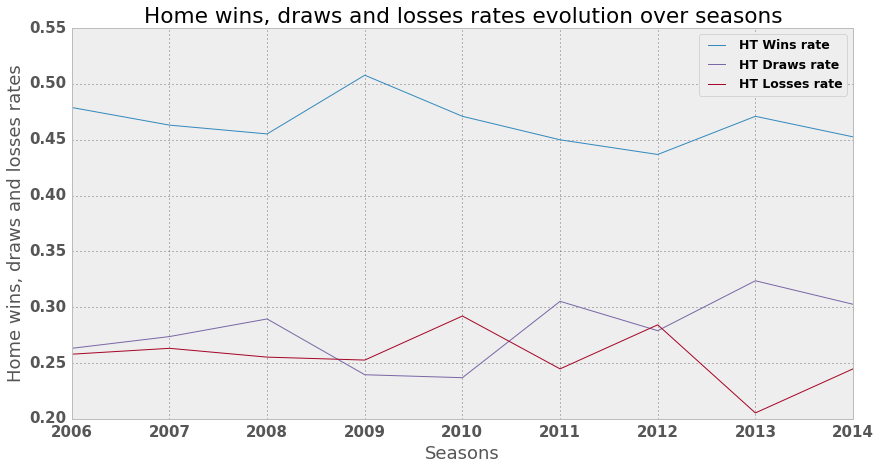

In [39]:
#Home wins, Away wins and draws rates variations over seasons
HW_rates = []
AW_rates = []
D_rates = []

for season in seasons:
    season_data = E0_data[E0_data['Season'] == season]
    total_matches_nb = len(season_data.index)
    HW_rate = float(len(season_data[season_data['FTR'] == 'H'].index))/float(total_matches_nb)
    AW_rate = float(len(season_data[season_data['FTR'] == 'A'].index))/float(total_matches_nb)
    D_rate = float(len(season_data[season_data['FTR'] == 'D'].index))/float(total_matches_nb)
    HW_rates.append(HW_rate)
    AW_rates.append(AW_rate)
    D_rates.append(D_rate)

plt.figure()
plt.plot(seasons, HW_rates, label="Home wins rate")
plt.plot(seasons, AW_rates, label="Away wins rate")
plt.plot(seasons, D_rates, label="Draw rates")
plt.legend(["HT Wins rate", "HT Draws rate", "HT Losses rate"], 1, fontsize='small')
plt.xticks([int(season) for season in seasons], seasons)
plt.xlabel("Seasons")
plt.ylabel("Home wins, draws and losses rates")
plt.title("Home wins, draws and losses rates evolution over seasons")

#global wins, draws and losses rates
HW_rate = float(len(E0_data[E0_data['HR'] == 'W'].index))/float(len(E0_data.index))
HL_rate = float(len(E0_data[E0_data['HR'] == 'L'].index))/float(len(E0_data.index))
HD_rate = float(len(E0_data[E0_data['HR'] == 'D'].index))/float(len(E0_data.index))
rates = [HW_rate, HL_rate, HD_rate]

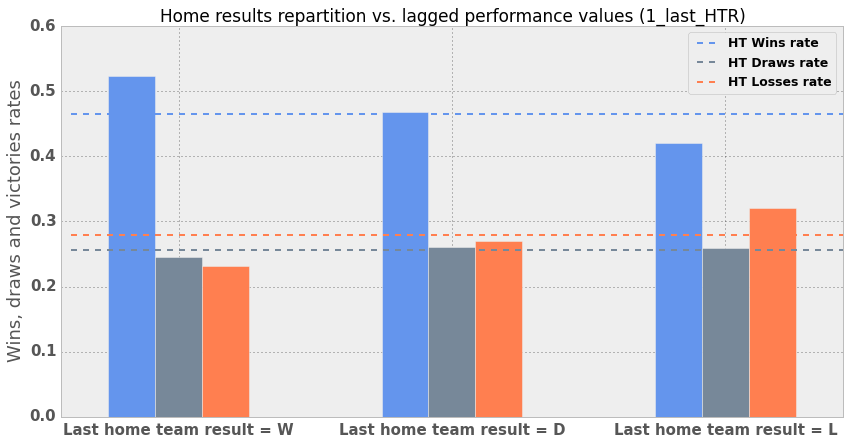

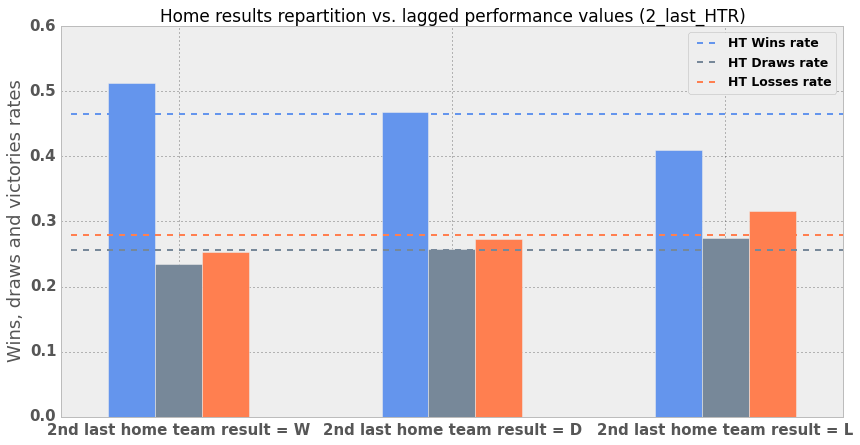

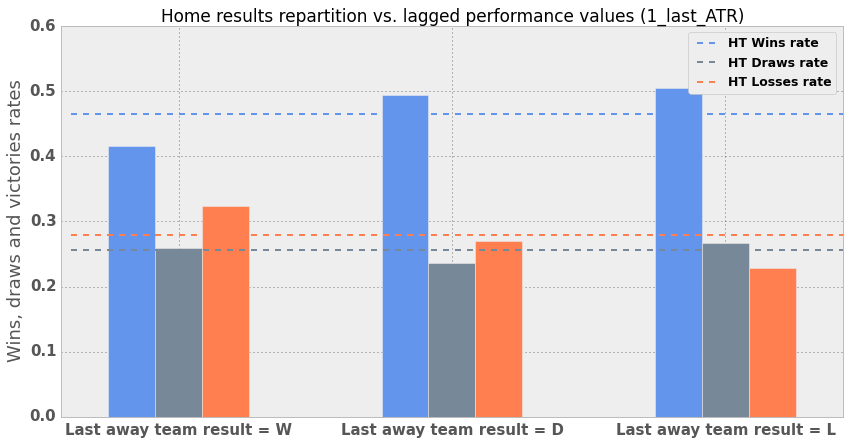

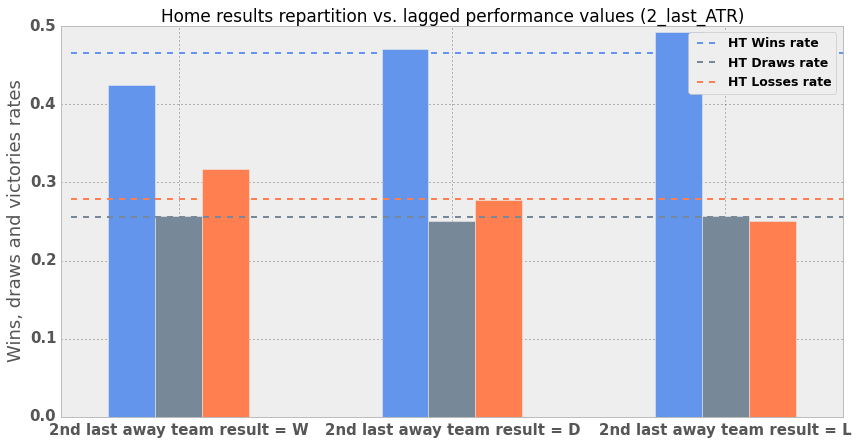

In [92]:
width = 0.12
xticks = np.array([0.3, 1.0, 1.7])
xticksLabels = ['0.0 - 0.2', '0.2 - 0.4', '0.4 - 0.6']
xlabels = [["Last home team result = W", "Last home team result = D", "Last home team result = L"],
           ["2nd last home team result = W", "2nd last home team result = D", "2nd last home team result = L"],
           ["Last away team result = W", "Last away team result = D", "Last away team result = L"],
            ["2nd last away team result = W", "2nd last away team result = D", "2nd last away team result = L"]]

var_names = ['1_last_HTR', '2_last_HTR', '1_last_ATR', '2_last_ATR']
titles = ["Home results repartition vs. lagged performance values (" + var_name + ")" for var_name in var_names]

k=0
for var_name in var_names:
    
    fig = plt.figure()
    HW_rates = []
    HD_rates = []
    
    for Rvalue in ['W','D','L']:
        HW_rates.append(len(E0_data[(E0_data[var_name] == Rvalue) & (E0_data['HR'] == 'W')].index) / len(E0_data[E0_data[var_name] == Rvalue].index))
        HD_rates.append(len(E0_data[(E0_data[var_name] == Rvalue) & (E0_data['HR'] == 'D')].index) / len(E0_data[E0_data[var_name] == Rvalue].index))
    
    HL_rates = [1 - (HW_rate + HD_rate) for (HW_rate, HD_rate) in zip(HW_rates, HD_rates)]
    
    plt.bar(xticks - 1.5 * width, HW_rates, width, color = '#6495ED')
    plt.bar(xticks - 0.5 * width, HD_rates, width, color = '#778899')
    plt.bar(xticks + 0.5 * width, HL_rates, width, color = '#FF7F50')
    plt.plot((0.025, 2.0), (HW_rate, HW_rate), '--', color='#6495ED', linewidth=2)
    plt.plot((0.025, 2.0), (HD_rate, HD_rate), '--', color='#778899', linewidth=2)
    plt.plot((0.025, 2.0), (HL_rate, HL_rate), '--', color='#FF7F50', linewidth=2)
    
    pylab.xticks(xticks, xlabels[k])
    plt.ylabel("Wins, draws and victories rates")
    plt.legend(["HT Wins rate", "HT Draws rate", "HT Losses rate"], 1, fontsize='small')
    plt.xlim(0.0, 2.0)
    plt.title(titles[k], fontsize=17)

    k += 1

**Conclusion** : these histograms show a **slight correlation** between last or 2nd last home/away team results and current next home result. Nevertheless, when this past result (away or home) is a draw, results repartition is significantly close to the global repartition.

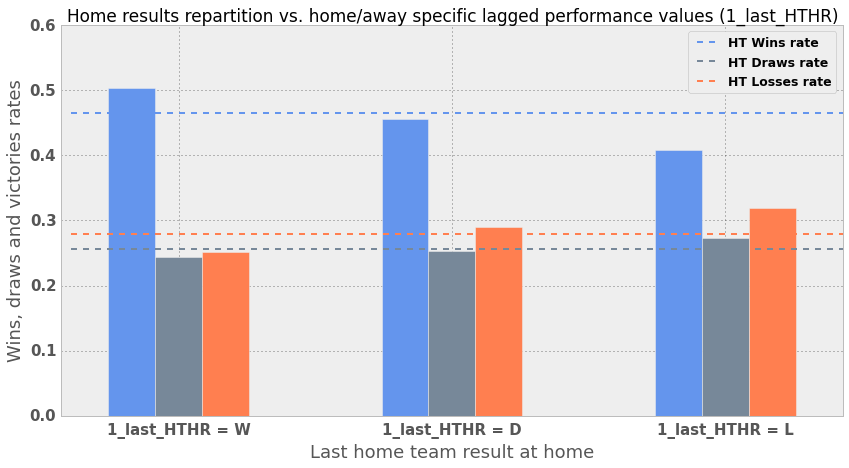

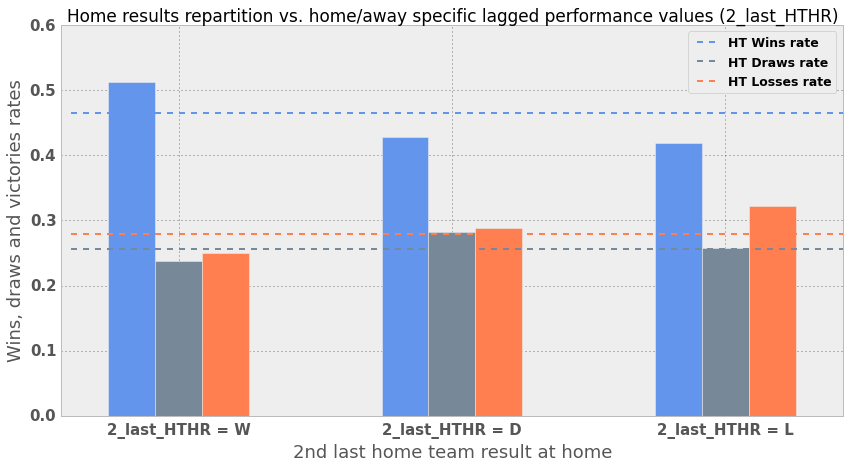

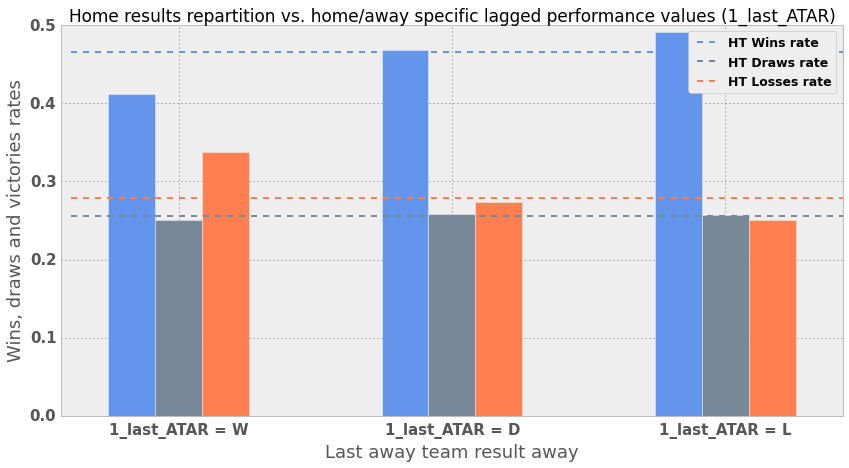

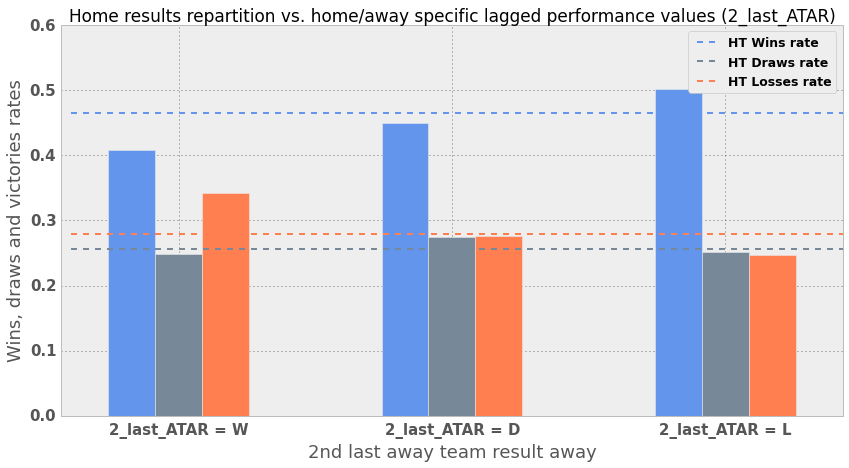

In [53]:
var_names = ['1_last_HTHR', '2_last_HTHR', '1_last_ATAR', '2_last_ATAR']
xTicksLabels = [["1_last_HTHR = W", "1_last_HTHR = D", "1_last_HTHR = L"],
           ["2_last_HTHR = W", "2_last_HTHR = D", "2_last_HTHR = L"],
           ["1_last_ATAR = W", "1_last_ATAR = D", "1_last_ATAR = L"],
            ["2_last_ATAR = W", "2_last_ATAR = D", "2_last_ATAR = L"]]
xlabels = ["Last home team result at home", "2nd last home team result at home",
           "Last away team result away", "2nd last away team result away"]
titles = ["Home results repartition vs. home/away specific lagged performance values (" + var_name + ")" for var_name in var_names]

width = 0.12
xticks = np.array([0.3, 1.0, 1.7])

k=0
for var_name in var_names:
    
    fig = plt.figure()
    HW_rates = []
    HD_rates = []
    
    for Rvalue in ['W','D','L']:
        HW_rates.append(len(E0_data[(E0_data[var_name] == Rvalue) & (E0_data['HR'] == 'W')].index) / len(E0_data[E0_data[var_name] == Rvalue].index))
        HD_rates.append(len(E0_data[(E0_data[var_name] == Rvalue) & (E0_data['HR'] == 'D')].index) / len(E0_data[E0_data[var_name] == Rvalue].index))
    
    HL_rates = [1 - (HW_rate + HD_rate) for (HW_rate, HD_rate) in zip(HW_rates, HD_rates)]
    
    plt.bar(xticks - 1.5 * width, HW_rates, width, color = '#6495ED')
    plt.bar(xticks - 0.5 * width, HD_rates, width, color = '#778899')
    plt.bar(xticks + 0.5 * width, HL_rates, width, color = '#FF7F50') 
    plt.plot((0.025, 2.0), (HW_rate, HW_rate), '--', color='#6495ED', linewidth=2)
    plt.plot((0.025, 2.0), (HD_rate, HD_rate), '--', color='#778899', linewidth=2)
    plt.plot((0.025, 2.0), (HL_rate, HL_rate), '--', color='#FF7F50', linewidth=2)

    pylab.xticks(xticks, xTicksLabels[k])
    plt.xlabel(xlabels[k])
    plt.ylabel("Wins, draws and victories rates")
    plt.legend(["HT Wins rate", "HT Draws rate", "HT Losses rate"], 1, fontsize='small')
    plt.xlim(0.0, 2.0)
    plt.title(titles[k], fontsize=17)

    k += 1

**Conclusion** : these histograms show the **same type of relationship** between home/away past results of home/away and next home results. Indeed, information stored in these variables are redundant with the previous ones.

### Visualization of complex lagged performance (results average) features on result of matches

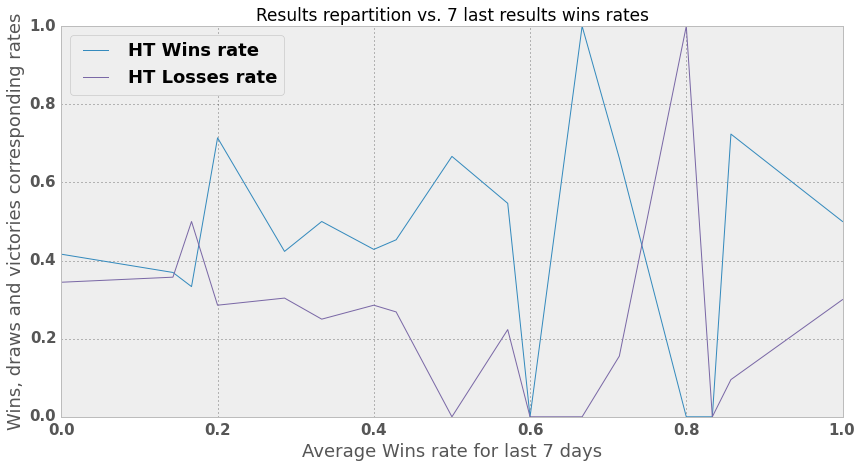

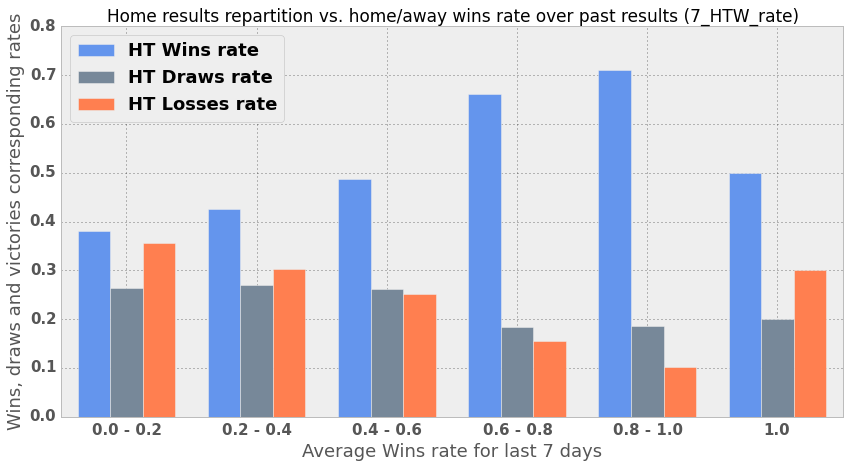

In [91]:
var_names = ['7_HTW_rate']
for var_name in var_names:
    fig = plt.figure()
    HTW_rate_val = np.sort(E0_data[var_name].unique())[0:-1]
    Wrates = []
    Lrates = []
    Drates = []
    for HTW_val in HTW_rate_val:
        Wrates.append(len(E0_data[(E0_data[var_name] == HTW_val) & (E0_data['HR'] == 'W')].index) / len(E0_data[E0_data[var_name] == HTW_val].index))
        Drates.append(len(E0_data[(E0_data[var_name] == HTW_val) & (E0_data['HR'] == 'D')].index) / len(E0_data[E0_data[var_name] == HTW_val].index))
    Lrates = [1 - (Wrate + Drate) for (Wrate, Drate) in zip(Wrates, Drates)]
    plt.plot(HTW_rate_val, Wrates)
    plt.plot(HTW_rate_val, Lrates)
    plt.title("Results repartition vs. 7 last results wins rates", fontsize=17)
    plt.xlabel("Average Wins rate for last 7 days")
    plt.ylabel("Wins, draws and victories corresponding rates")
    plt.legend(["HT Wins rate", "HT Losses rate"], 2)


    bars = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    width = (0.2 - 0.05)/3.0
    xticks = np.array([0.025, 0.225, 0.425, 0.625, 0.825, 1.025])
    xticksLabels = ['0.0 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1.0', '1.0']
    nonzeros_bars = []
    HW_rates = []
    HD_rates = []
    
    for bar in bars:
        if len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2))].index) > 0:
            nonzeros_bars.append(bar)
            HW_rates.append(len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2)) & (E0_data['HR'] == 'W')].index) / len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2))].index))
            HD_rates.append(len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2)) & (E0_data['HR'] == 'D')].index) / len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2))].index))
    HL_rates = [1 - (HW_rate + HD_rate) for (HW_rate, HD_rate) in zip(HW_rates, HD_rates)]
    
    fig = plt.figure()
    plt.bar(xticks, HW_rates, width, color = '#6495ED')
    plt.bar(xticks + width, HD_rates, width, color = '#778899')
    plt.bar(xticks + 2*width, HL_rates, width, color = '#FF7F50')
    pylab.xticks([0.1, 0.3, 0.5, 0.7, 0.9, 1.1], xticksLabels)
    plt.xlabel("Average Wins rate for last 7 days")
    plt.ylabel("Wins, draws and victories corresponding rates")
    plt.legend(["HT Wins rate", "HT Draws rate", "HT Losses rate"], 2)
    plt.title("Home results repartition vs. home/away wins rate over past results (7_HTW_rate)", fontsize=17)

--> The fact that this average over 7 past results can be done without 7 past results (5 at least) and that the distribution of the variable is not uniform gives the function its **erratic behaviour**. For that reason, the histogram visualization is clearly better. Nevertheless, **extrem wins/draws/losses rates (when k_XTW/D/L_rate close to 0 or 1) can be irrelevant due to the fact this case doesn't occur frequently**. 

Past wins rate features

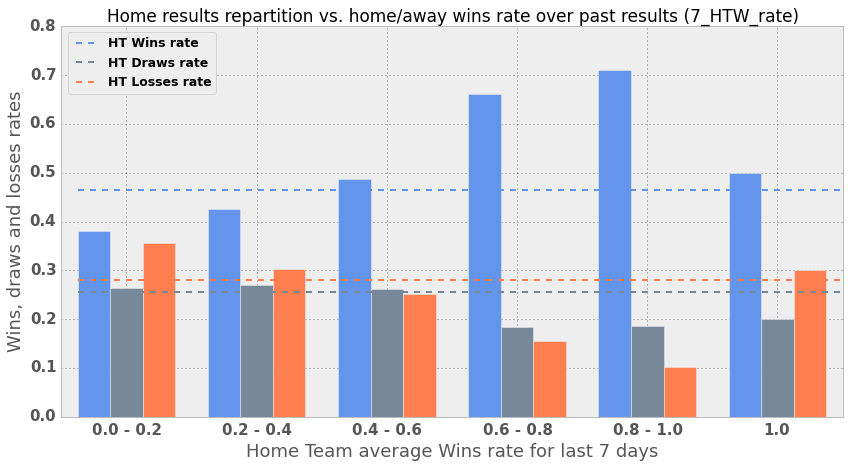

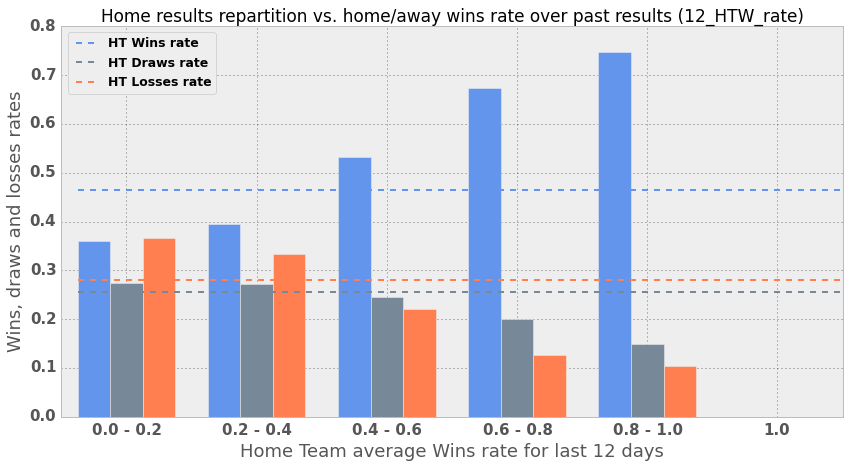

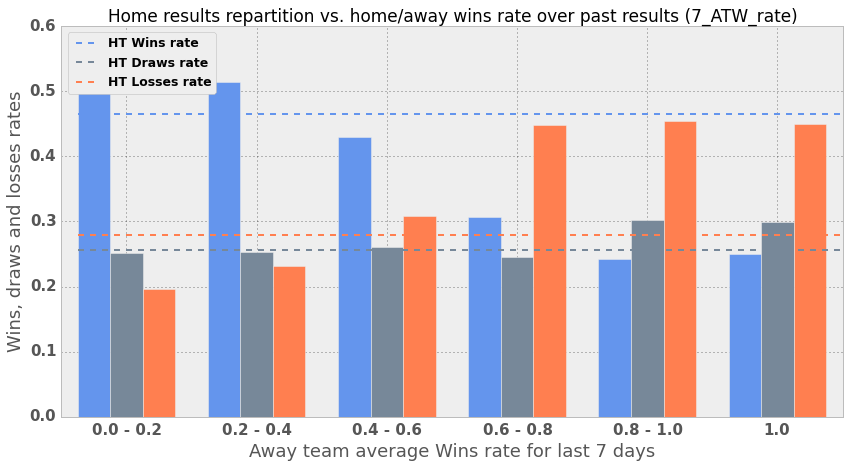

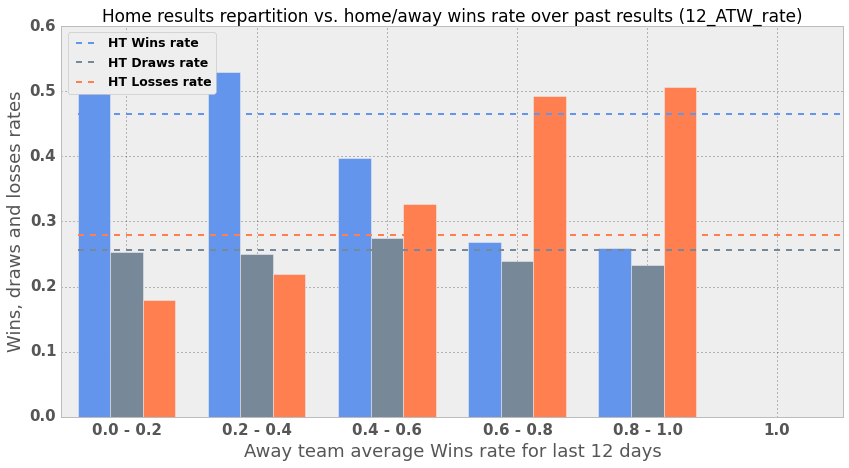

In [80]:
bars = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
width = (0.2 - 0.05)/3.0
xticks = np.array([0.025, 0.225, 0.425, 0.625, 0.825, 1.025])
xticksLabels = ['0.0 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1.0', '1.0']
xlabels = ["Home Team average Wins rate for last 7 days", "Home Team average Wins rate for last 12 days", 
          "Away team average Wins rate for last 7 days", "Away team average Wins rate for last 12 days"]    
var_names = ['7_HTW_rate', '12_HTW_rate', '7_ATW_rate', '12_ATW_rate']
titles = ["Home results repartition vs. home/away wins rate over past results (" + var_name + ")" for var_name in var_names]


k=0
for var_name in var_names:
    
    fig = plt.figure()
    nonzero_bars = []
    nonzero_xticks = []
    HW_rates = []
    HD_rates = []
    
    for (bar, xtick) in zip(bars, xticks):
        if len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2))].index) > 0:
            nonzero_xticks.append(xtick)
            HW_rates.append(len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2)) & (E0_data['HR'] == 'W')].index) / len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2))].index))
            HD_rates.append(len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2)) & (E0_data['HR'] == 'D')].index) / len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2))].index))
    
    HL_rates = [1 - (HW_rate + HD_rate) for (HW_rate, HD_rate) in zip(HW_rates, HD_rates)]
    
    plt.bar(np.array(nonzero_xticks), HW_rates, width, color = '#6495ED')
    plt.bar(np.array(nonzero_xticks) + width, HD_rates, width, color = '#778899')
    plt.bar(np.array(nonzero_xticks) + 2*width, HL_rates, width, color = '#FF7F50')
    plt.plot((0.025, 1.2), (HW_rate, HW_rate), '--', color='#6495ED', linewidth=2)
    plt.plot((0.025, 1.2), (HD_rate, HD_rate), '--', color='#778899', linewidth=2)
    plt.plot((0.025, 1.2), (HL_rate, HL_rate), '--', color='#FF7F50', linewidth=2)

    pylab.xticks([0.1, 0.3, 0.5, 0.7, 0.9, 1.1], xticksLabels)
    plt.xlabel(xlabels[k])
    plt.ylabel("Wins, draws and losses rates")
    plt.legend(["HT Wins rate", "HT Draws rate", "HT Losses rate"], 2, fontsize='small')
    plt.title(titles[k], fontsize=17)



    k += 1

Past losses rate features

[]

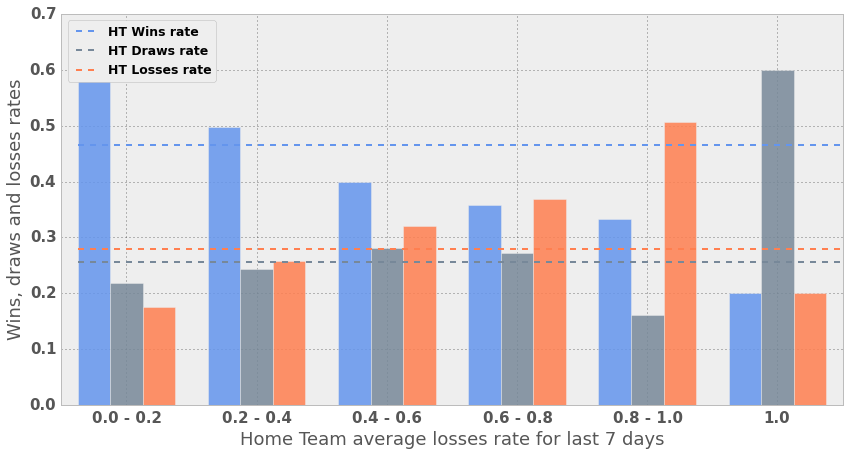

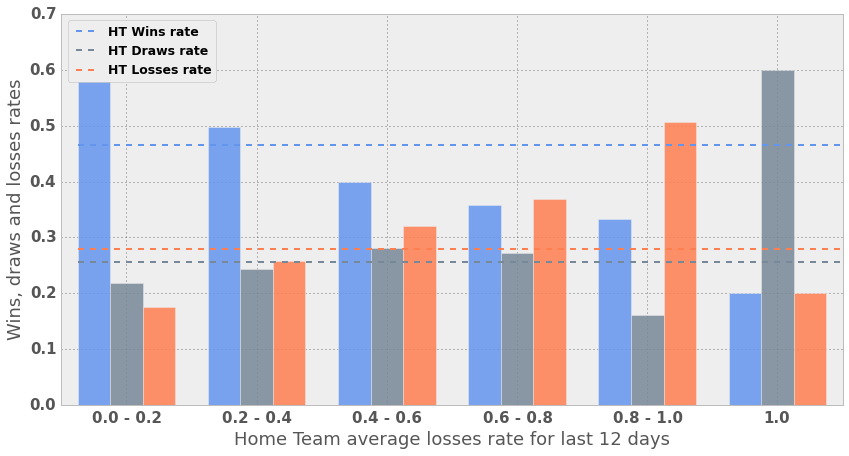

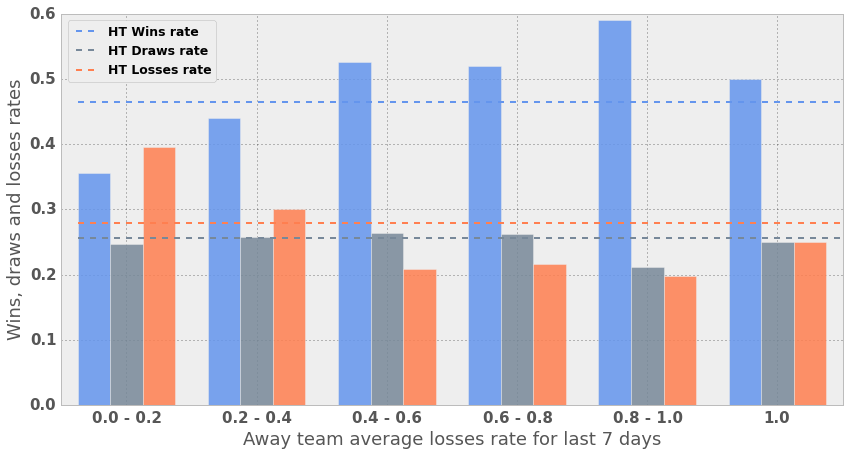

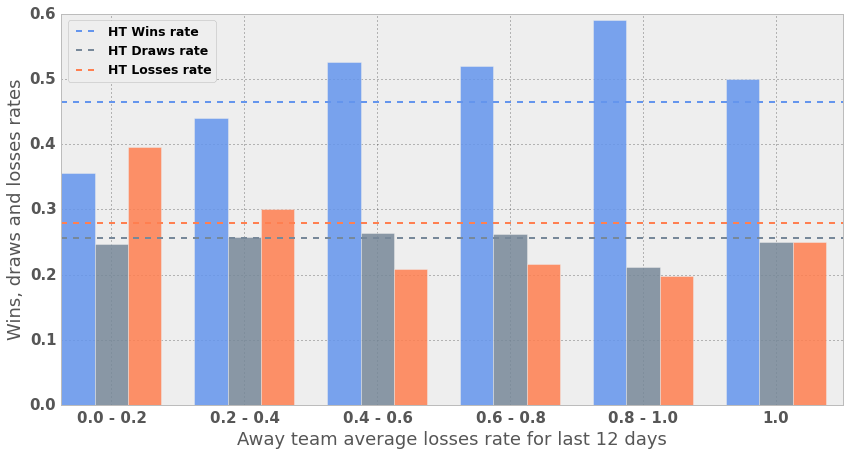

In [79]:
bars = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
width = (0.2 - 0.05)/3.0
xticks = np.array([0.025, 0.225, 0.425, 0.625, 0.825, 1.025])
xticksLabels = ['0.0 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1.0', '1.0']
xlabels = ["Home Team average losses rate for last 7 days", "Home Team average losses rate for last 12 days", 
          "Away team average losses rate for last 7 days", "Away team average losses rate for last 12 days"]    
var_names = ['7_HTL_rate', '12_HTL_rate', '7_ATL_rate', '12_ATL_rate']

k=0
for var_name in var_names:
    
    fig = plt.figure()
    nonzero_bars = []
    nonzero_xticks = []
    HW_rates = []
    HD_rates = []
    
    for (bar, xtick) in zip(bars, xticks):
        if len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2))].index) > 0:
            nonzero_bars.append(bar)
            nonzero_xticks.append(xtick)
            HW_rates.append(len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2)) & (E0_data['HR'] == 'W')].index) / len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2))].index))
            HD_rates.append(len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2)) & (E0_data['HR'] == 'D')].index) / len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2))].index))
    
    HL_rates = [1 - (HW_rate + HD_rate) for (HW_rate, HD_rate) in zip(HW_rates, HD_rates)]
    
    plt.bar(np.array(nonzero_xticks), HW_rates, width, color = '#6495ED', alpha=0.85)    
    plt.bar(np.array(nonzero_xticks) + width, HD_rates, width, color = '#778899', alpha=0.85)    
    plt.bar(np.array(nonzero_xticks) + 2*width, HL_rates, width, color = '#FF7F50', alpha=0.85)
        
    plt.plot((0.025, 1.2), (HW_rate, HW_rate), '--', color='#6495ED', linewidth=2)
    plt.plot((0.025, 1.2), (HD_rate, HD_rate), '--', color='#778899', linewidth=2)
    plt.plot((0.025, 1.2), (HL_rate, HL_rate), '--', color='#FF7F50', linewidth=2)
    
    pylab.xticks([0.1, 0.3, 0.5, 0.7, 0.9, 1.1], xticksLabels)
    plt.xlabel(xlabels[k])
    plt.ylabel("Wins, draws and losses rates")
    plt.legend(["HT Wins rate", "HT Draws rate", "HT Losses rate"], 2, fontsize='small')


    k += 1
plt.plot()

**Conclusion** : We can see an **important link between home/away 7/12 past wins average and the next home result**. The correlation between this set of variable and the next result seems even stronger than the one between simple lagged result variables and the next result. 

Home/away past results rates features

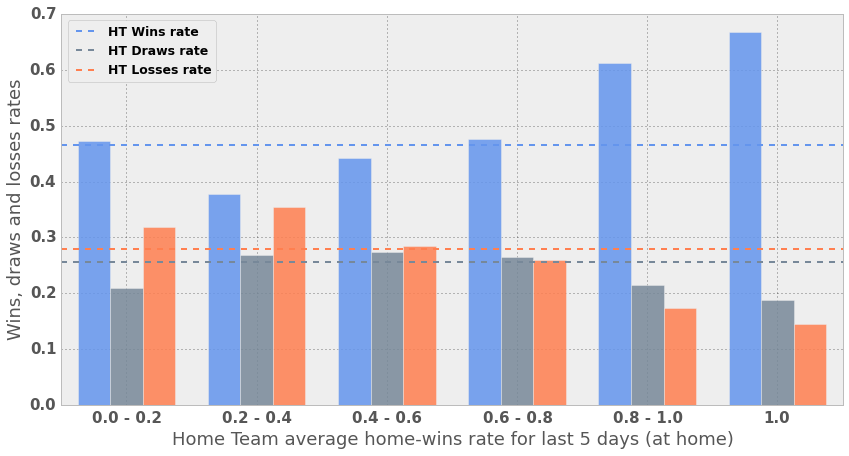

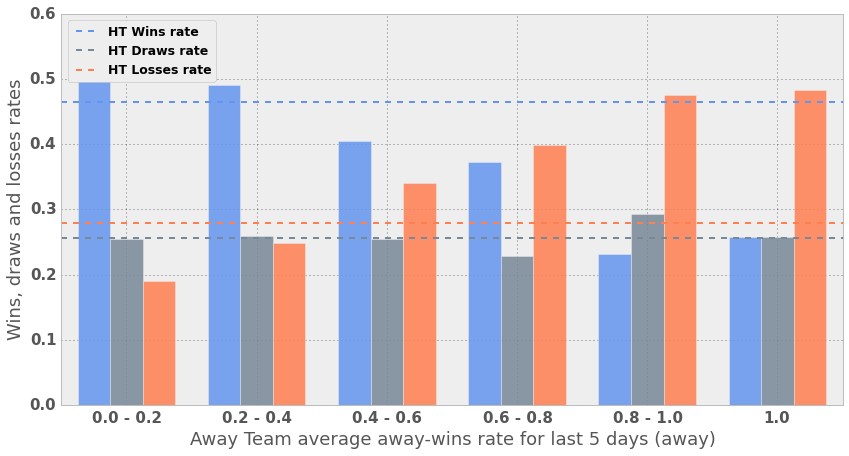

In [78]:
bars = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
width = (0.2 - 0.05)/3.0
xticks = np.array([0.025, 0.225, 0.425, 0.625, 0.825, 1.025])
xticksLabels = ['0.0 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1.0', '1.0']
xlabels = ["Home Team average home-wins rate for last 5 days (at home)", "Away Team average away-wins rate for last 5 days (away)"]    
var_names = ['5_HTHW_rate', '5_ATAW_rate']

k=0
for var_name in var_names:
    
    fig = plt.figure()
    nonzero_bars = []
    nonzero_xticks = []
    HW_rates = []
    HD_rates = []
    
    for (bar, xtick) in zip(bars, xticks):
        if len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2))].index) > 0:
            nonzero_bars.append(bar)
            nonzero_xticks.append(xtick)
            HW_rates.append(len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2)) & (E0_data['HR'] == 'W')].index) / len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2))].index))
            HD_rates.append(len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2)) & (E0_data['HR'] == 'D')].index) / len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2))].index))
    
    HL_rates = [1 - (HW_rate + HD_rate) for (HW_rate, HD_rate) in zip(HW_rates, HD_rates)]
    
    plt.bar(np.array(nonzero_xticks), HW_rates, width, color = '#6495ED', alpha = 0.85)
    plt.bar(np.array(nonzero_xticks) + width, HD_rates, width, color = '#778899', alpha = 0.85)
    plt.bar(np.array(nonzero_xticks) + 2*width, HL_rates, width, color = '#FF7F50', alpha = 0.85)
    
    plt.plot((0.0, 1.2), (HW_rate, HW_rate), '--', color='#6495ED', linewidth=2)
    plt.plot((0.0, 1.2), (HD_rate, HD_rate), '--', color='#778899', linewidth=2)
    plt.plot((0.0, 1.2), (HL_rate, HL_rate), '--', color='#FF7F50', linewidth=2)
    
    pylab.xticks([0.1, 0.3, 0.5, 0.7, 0.9, 1.1], xticksLabels)
    plt.xlabel(xlabels[k])
    plt.ylabel("Wins, draws and losses rates")
    plt.legend(["HT Wins rate", "HT Draws rate", "HT Losses rate"], 2, fontsize='small')
    
    k += 1

### Elo rank feature visualization

First, let's have a look at Elo score distribution..

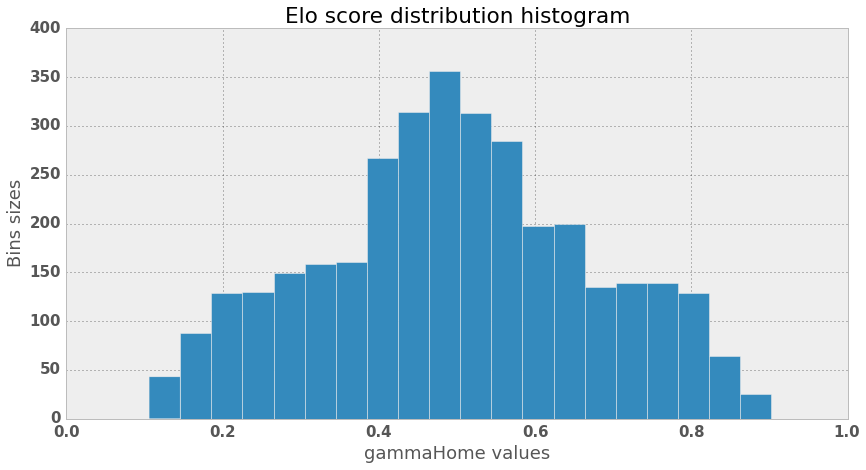

In [62]:
plt.hist(E0_data['gammaHome'].values, bins=20)
plt.xlabel("gammaHome values")
plt.ylabel("Bins sizes")
plt.xlim(0,1)
plt.title("Elo score distribution histogram")

Conclusion : this distribution is almost symetric and seems close to a normal distribution. To visualize effect of this feature over home results we need to adapt to this distribution and create equal size bins.

Let's have a look at team specific Elo score evolution...

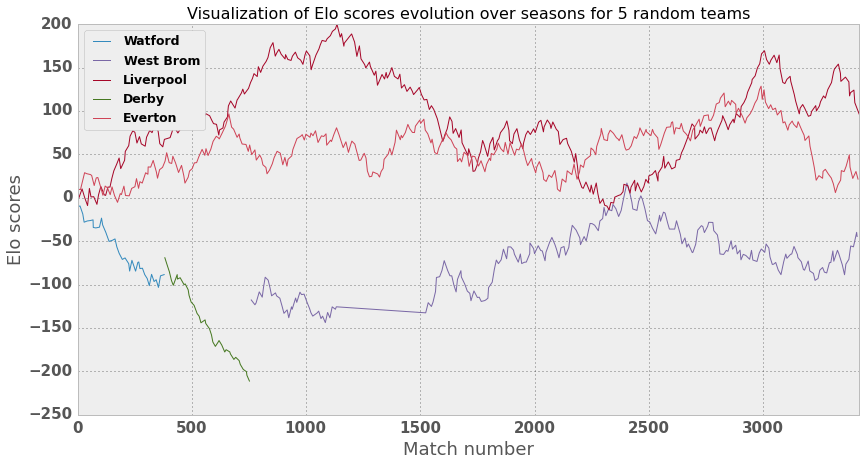

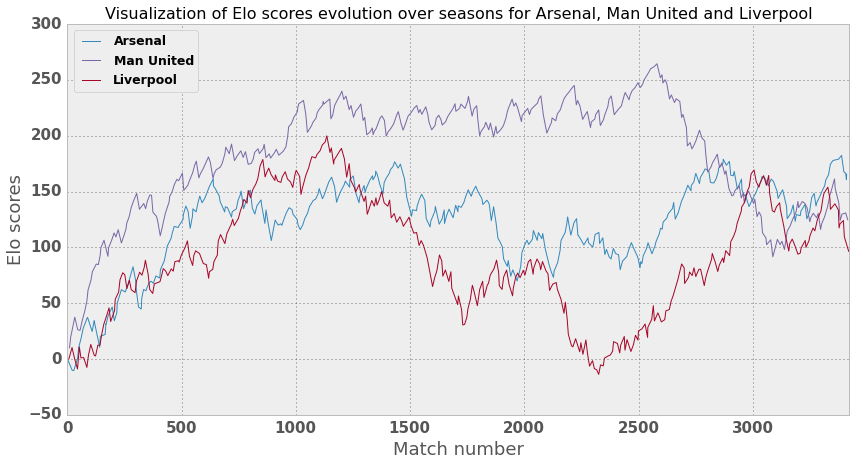

In [114]:
fig = plt.figure()
#random teams elo score visualization
random_teams = [teams[random.randint(0, len(teams))-1] for k in range(0,5)]
for team in random_teams:
    HomeEloScores = E0_data[E0_data['HomeTeam'] == team]['HTeamEloScore']
    AwayEloScores = E0_data[E0_data['AwayTeam'] == team]['ATeamEloScore']
    EloScores = pd.concat([HomeEloScores, AwayEloScores]).sort_index()
    EloScores.plot()
plt.legend(random_teams, 2, fontsize="small")
plt.xlabel('Match number')
plt.ylabel('Elo scores')
plt.title('Visualization of Elo scores evolution over seasons for 5 random teams', fontsize = 16)
    
fig = plt.figure()
for team in ['Arsenal', 'Man United', 'Liverpool']:
    HomeEloScores = E0_data[E0_data['HomeTeam'] == team]['HTeamEloScore']
    AwayEloScores = E0_data[E0_data['AwayTeam'] == team]['ATeamEloScore']
    EloScores = pd.concat([HomeEloScores, AwayEloScores]).sort_index()
    EloScores.plot()
plt.legend(['Arsenal', 'Man United', 'Liverpool'], 2, fontsize='small')
plt.xlabel('Match number')
plt.ylabel('Elo scores')
plt.title('Visualization of Elo scores evolution over seasons for Arsenal, Man United and Liverpool', fontsize=16)

**Conclusion** : it seems that at least **2 seasons are needed for teams Elo scores to get to their "normal values range"** (2 seasons = 2 * 380 matches). 

Now, let's have a look at the relationship between gammaHome score and match home result...

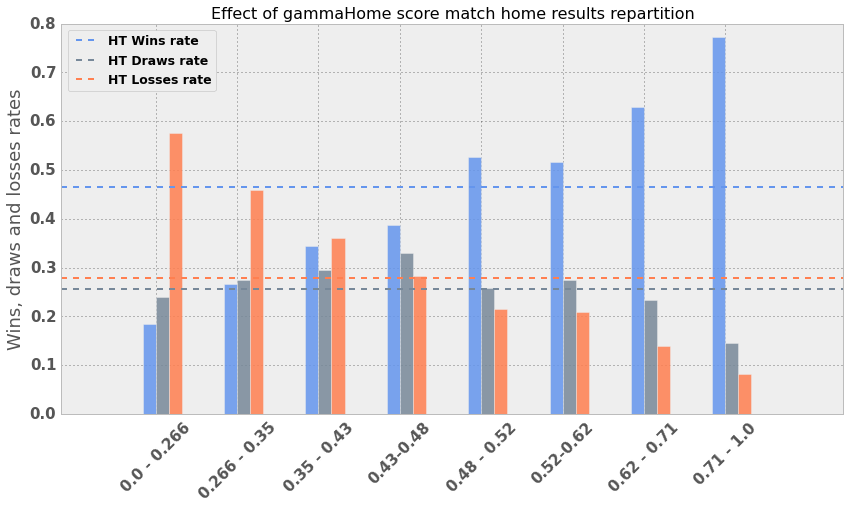

In [77]:
#we define bins of approximatively equal sizes in terms of Elo score
bars = [0.0, 0.266, 0.35, 0.43, 0.48, 0.52, 0.62, 0.71, 1.0]
bars_pos = [0.0 + k * (1.0/8.0) for k in range(1,9)]
width = 0.02
xticks = np.array([(bars[k+1] - bars[k])/2.0 for k in range(0, len(bars) - 1)])
xticksLabels = ['0.0 - 0.266', '0.266 - 0.35','0.35 - 0.43', '0.43-0.48', '0.48 - 0.52','0.52-0.62', '0.62 - 0.71', '0.71 - 1.0']
xlabels = ["Home Team average home-wins rate for last 5 days (at home)", "Away Team average away-wins rate for last 5 days (away)"]    

HW_rates = []
HD_rates = []
HL_rates = []

for k in range(0 , len(bars) - 1):
    HW_rates.append(len(E0_data[(E0_data['gammaHome'] >= bars[k]) & (E0_data['gammaHome'] < bars[k+1]) & (E0_data['HR'] == 'W')].index) / len(E0_data[(E0_data['gammaHome'] >= bars[k]) & (E0_data['gammaHome'] < bars[k+1])].index))
    HD_rates.append(len(E0_data[(E0_data['gammaHome'] >= bars[k]) & (E0_data['gammaHome'] < bars[k+1]) & (E0_data['HR'] == 'D')].index) / len(E0_data[(E0_data['gammaHome'] >= bars[k]) & (E0_data['gammaHome'] < bars[k+1])].index))
    HL_rates = [1 - (HW_rate + HD_rate) for (HW_rate, HD_rate) in zip(HW_rates, HD_rates)]
    
plt.bar(np.array(bars_pos), HW_rates, width, color = '#6495ED', alpha = 0.85)
plt.bar(np.array(bars_pos) + width, HD_rates, width, color = '#778899', alpha = 0.85)
plt.bar(np.array(bars_pos) + 2*width, HL_rates, width, color = '#FF7F50', alpha = 0.85)

plt.plot((0.0, 1.2), (HW_rate, HW_rate), '--', color='#6495ED', linewidth=2)
plt.plot((0.0, 1.2), (HD_rate, HD_rate), '--', color='#778899', linewidth=2)
plt.plot((0.0, 1.2), (HL_rate, HL_rate), '--', color='#FF7F50', linewidth=2)
    
plt.ylabel("Wins, draws and losses rates")
plt.legend(["HT Wins rate", "HT Draws rate", "HT Losses rate"], 2, fontsize='small')
plt.xlim(0,1.2)
pylab.xticks(np.array(bars_pos) + width, xticksLabels, rotation=45)
plt.title("Effect of gammaHome score match home results repartition", fontsize=16)

**Conclusion** : **Elo score seems to give very relevant information about the match result**. When gammaHome is high, home team wins about 80% of its home matches, whereas the inverse occurs when gammaHome is close to 0 (loses ~60% of its matches). When gammaHome is close to 0.5, results repartition is close to a uniform repartition (W = 38%, D = 33%, L = 29%)

### Days since last league match feature (team tiredness)

First, let's have a look at HTdaysSinceLastMatch repartition (ATdaysSinceLastMatch repartition will globally be identical to HTdaysSinceLastMatch repartition)...

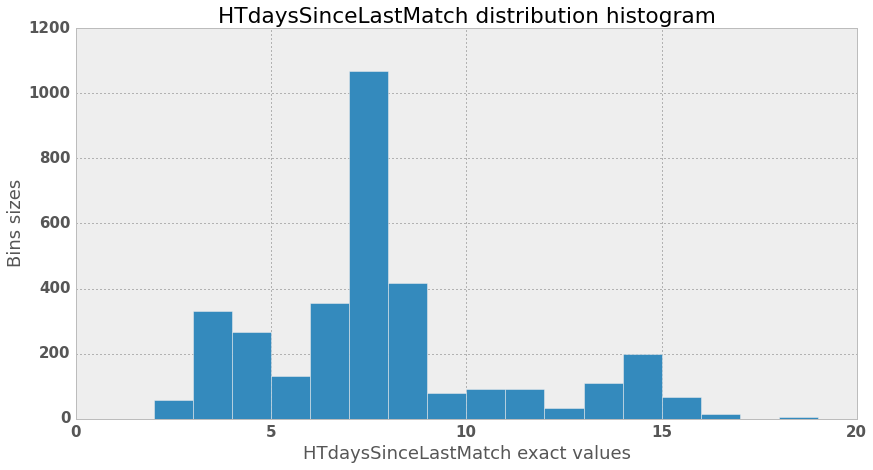

In [75]:
fig = plt.figure()
plt.hist(E0_data['HTdaysSinceLastMatch'].dropna(axis=0).values, bins = [k for k in range(0,20)])
plt.xlabel('HTdaysSinceLastMatch exact values')
plt.ylabel('Bins sizes')
plt.title('HTdaysSinceLastMatch distribution histogram')

Given this non-uniform repartition, we need to define bins of minimum sizes for analyzing effect of this feature over matches results.

Now, let's have a look at influences of HTdaysSinceLastMatch and ATdaysSinceLastMatch over matches home results... 

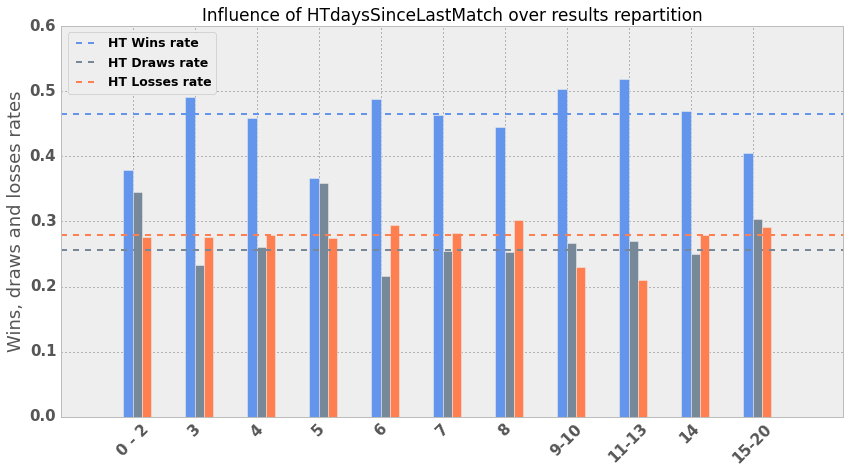

In [82]:
fig = plt.figure()

#we define bins of minimum size for HTdaysSinceLastMatch
bins = [0, 3, 4, 5, 6, 7, 8, 9, 11, 14, 15, 21]
bars_pos = [0.0 + k * (20/12.0) for k in range(1,12)]
width = 0.25
xticksLabels = ['0 - 2', '3', '4', '5', '6', '7','8', '9-10', '11-13', '14', '15-20']

HW_rates = []
HD_rates = []
HL_rates = []

for k in range(0 , len(bins) - 1):
    HW_rates.append(len(E0_data[(E0_data['HTdaysSinceLastMatch'] >= bins[k]) & (E0_data['HTdaysSinceLastMatch'] < bins[k+1]) & (E0_data['HR'] == 'W')].index) / len(E0_data[(E0_data['HTdaysSinceLastMatch'] >= bins[k]) & (E0_data['HTdaysSinceLastMatch'] < bins[k+1])].index))
    HD_rates.append(len(E0_data[(E0_data['HTdaysSinceLastMatch'] >= bins[k]) & (E0_data['HTdaysSinceLastMatch'] < bins[k+1]) & (E0_data['HR'] == 'D')].index) / len(E0_data[(E0_data['HTdaysSinceLastMatch'] >= bins[k]) & (E0_data['HTdaysSinceLastMatch'] < bins[k+1])].index))
    HL_rates = [1 - (HW_rate + HD_rate) for (HW_rate, HD_rate) in zip(HW_rates, HD_rates)]
    
plt.bar(np.array(bars_pos), HW_rates, width, color = '#6495ED')
plt.bar(np.array(bars_pos) + width, HD_rates, width, color = '#778899')
plt.bar(np.array(bars_pos) + 2*width, HL_rates, width, color = '#FF7F50')

plt.plot((0.0, 21), (HW_rate, HW_rate), '--', color='#6495ED', linewidth=2)
plt.plot((0.0, 21), (HD_rate, HD_rate), '--', color='#778899', linewidth=2)
plt.plot((0.0, 21), (HL_rate, HL_rate), '--', color='#FF7F50', linewidth=2)

pylab.xticks(np.array(bars_pos) + width, xticksLabels, rotation=45)
plt.ylabel("Wins, draws and losses rates")
plt.legend(["HT Wins rate", "HT Draws rate", "HT Losses rate"], 2, fontsize='small')
plt.xlim(0,21)
plt.title("Influence of HTdaysSinceLastMatch over results repartition", fontsize = 17)

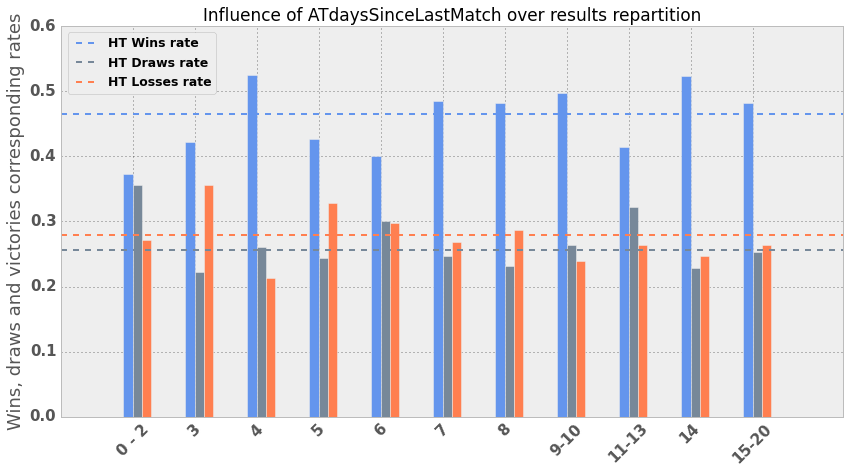

In [83]:
fig = plt.figure()
bins = [0, 3, 4, 5, 6, 7, 8, 9, 11, 14, 15, 21]
bars_pos = [0.0 + k * (20/12.0) for k in range(1,12)]
width = 0.25
xticksLabels = ['0 - 2', '3', '4', '5', '6', '7','8', '9-10', '11-13', '14', '15-20']

HW_rates = []
HD_rates = []
HL_rates = []

for k in range(0 , len(bins) - 1):
    HW_rates.append(len(E0_data[(E0_data['ATdaysSinceLastMatch'] >= bins[k]) & (E0_data['ATdaysSinceLastMatch'] < bins[k+1]) & (E0_data['HR'] == 'W')].index) / len(E0_data[(E0_data['ATdaysSinceLastMatch'] >= bins[k]) & (E0_data['ATdaysSinceLastMatch'] < bins[k+1])].index))
    HD_rates.append(len(E0_data[(E0_data['ATdaysSinceLastMatch'] >= bins[k]) & (E0_data['ATdaysSinceLastMatch'] < bins[k+1]) & (E0_data['HR'] == 'D')].index) / len(E0_data[(E0_data['ATdaysSinceLastMatch'] >= bins[k]) & (E0_data['ATdaysSinceLastMatch'] < bins[k+1])].index))
    HL_rates = [1 - (HW_rate + HD_rate) for (HW_rate, HD_rate) in zip(HW_rates, HD_rates)]
    
plt.bar(np.array(bars_pos), HW_rates, width, color = '#6495ED')
plt.bar(np.array(bars_pos) + width, HD_rates, width, color = '#778899')
plt.bar(np.array(bars_pos) + 2*width, HL_rates, width, color = '#FF7F50')

plt.plot((0.0, 21), (HW_rate, HW_rate), '--', color='#6495ED', linewidth=2)
plt.plot((0.0, 21), (HD_rate, HD_rate), '--', color='#778899', linewidth=2)
plt.plot((0.0, 21), (HL_rate, HL_rate), '--', color='#FF7F50', linewidth=2)

pylab.xticks(np.array(bars_pos) + width, xticksLabels, rotation=45)
plt.ylabel("Wins, draws and victories corresponding rates")
plt.legend(["HT Wins rate", "HT Draws rate", "HT Losses rate"], 2, fontsize='small')
plt.xlim(0,21)
plt.title("Influence of ATdaysSinceLastMatch over results repartition", fontsize = 17)

**Conclusion** : **we can't see any evident relationship between A/HTdaysSinceLastMatch over match results**. This may be due to the fact that there is no existing correlation between these two of that this visualization is not correct. Moreover, when teams play lots of matches in short time periods, this is due to the fact that the team had other games in European competition or in National tournaments finals and thus indicates that the team is supposed to be a good or very good team. **That could explain why we almost observe the inverse of what we expected.**

Let's have a look at the effect of the variable combining these 2 previous features (rate between the 2) to see if more relevant insight shows up...

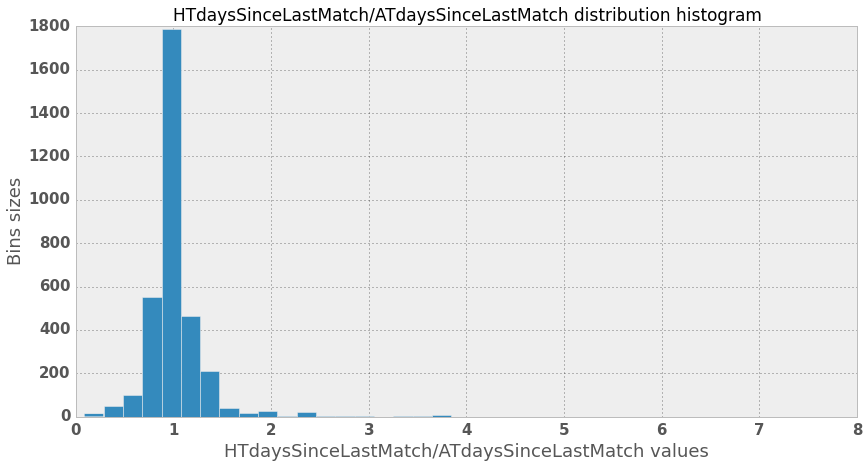

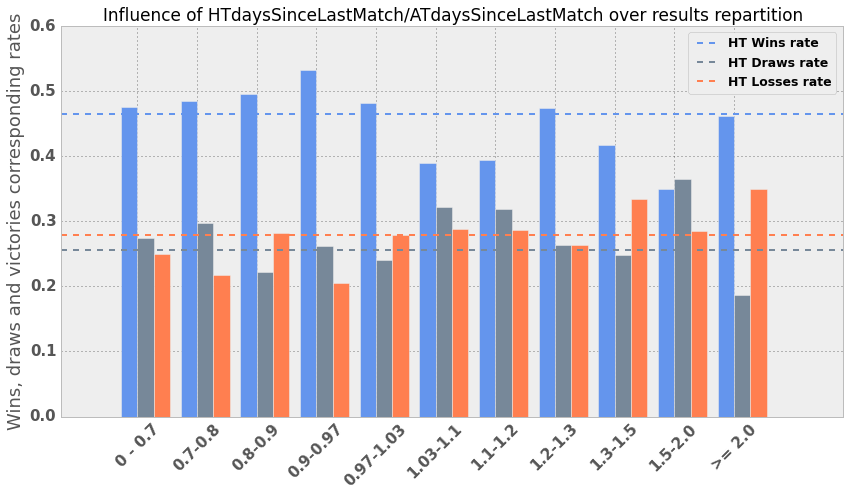

In [86]:
#corresponding feature construction
E0_data['DaysSinceLastMatchRate'] = E0_data['HTdaysSinceLastMatch'].astype(float)/E0_data['ATdaysSinceLastMatch'].astype(float)

fig = plt.figure()
plt.hist(E0_data['DaysSinceLastMatchRate'].dropna(axis=0).values, bins=40)
plt.xlabel('HTdaysSinceLastMatch/ATdaysSinceLastMatch values')
plt.ylabel('Bins sizes')
plt.title('HTdaysSinceLastMatch/ATdaysSinceLastMatch distribution histogram', fontsize=17)

fig = plt.figure()
bins = [0, 0.7, 0.8, 0.9, 0.97, 1.03, 1.1, 1.2, 1.3, 1.5, 2, 8]
bars_pos = [0.0 + k * (2.2/12.0) for k in range(1,12)]
width = 0.05
xticksLabels = ['0 - 0.7', '0.7-0.8', '0.8-0.9', 
                '0.9-0.97', '0.97-1.03', '1.03-1.1',
                '1.1-1.2', '1.2-1.3', '1.3-1.5', 
                '1.5-2.0', '>= 2.0']

HW_rates = []
HD_rates = []
HL_rates = []

for k in range(0 , len(bins) - 1):
    HW_rates.append(len(E0_data[(E0_data['DaysSinceLastMatchRate'] >= bins[k]) & (E0_data['DaysSinceLastMatchRate'] < bins[k+1]) & (E0_data['HR'] == 'W')].index) / len(E0_data[(E0_data['DaysSinceLastMatchRate'] >= bins[k]) & (E0_data['DaysSinceLastMatchRate'] < bins[k+1])].index))
    HD_rates.append(len(E0_data[(E0_data['DaysSinceLastMatchRate'] >= bins[k]) & (E0_data['DaysSinceLastMatchRate'] < bins[k+1]) & (E0_data['HR'] == 'D')].index) / len(E0_data[(E0_data['DaysSinceLastMatchRate'] >= bins[k]) & (E0_data['DaysSinceLastMatchRate'] < bins[k+1])].index))
    HL_rates = [1 - (HW_rate + HD_rate) for (HW_rate, HD_rate) in zip(HW_rates, HD_rates)]
    
plt.bar(np.array(bars_pos), HW_rates, width, color = '#6495ED')
plt.bar(np.array(bars_pos) + width, HD_rates, width, color = '#778899')
plt.bar(np.array(bars_pos) + 2*width, HL_rates, width, color = '#FF7F50')

plt.plot((0.0, 21), (HW_rate, HW_rate), '--', color='#6495ED', linewidth=2)
plt.plot((0.0, 21), (HD_rate, HD_rate), '--', color='#778899', linewidth=2)
plt.plot((0.0, 21), (HL_rate, HL_rate), '--', color='#FF7F50', linewidth=2)
    
#plt.xlabel(xlabels[k])
plt.ylabel("Wins, draws and victories corresponding rates")
plt.legend(["HT Wins rate", "HT Draws rate", "HT Losses rate"], 1, fontsize='small')
plt.xlim(0,2.4)
pylab.xticks(np.array(bars_pos) + width, xticksLabels, rotation=45)
plt.title("Influence of HTdaysSinceLastMatch/ATdaysSinceLastMatch over results repartition", fontsize = 17)

**Conclusion** : **the inverse effect of what we expected is even more clear here**. Therefore, we could argue that this variable is a good predictor but in fact, the information carried by this feature is extremely redundant with the Elo score and much less relevant. **We may need other competitions results (national tournaments, European tournaments) to make this feature a good predictor.**

### Correlation matrix visualization

In [118]:
E0_data_copy = E0_data[['HW', 'AW', 'D',
                        'gammaHome',
                        'DaysSinceLastMatchRate',
                        '1_last_HTR', '2_last_HTR',
                        '1_last_ATR', '2_last_ATR',
                        '1_last_HTHR', '2_last_HTHR',
                        '1_last_ATAR', '2_last_ATAR',
                        '7_HTW_rate', '12_HTW_rate', 
                        '7_ATW_rate', '12_ATW_rate', 
                        '7_HTL_rate', '12_HTL_rate', 
                        '7_ATL_rate', '12_ATD_rate',
                        '7_HTD_rate', '12_HTD_rate',
                        '7_ATD_rate', '7_ATD_rate',
                       '5_HTHW_rate', '5_ATAW_rate']]

#make dummies variables for the past results indicators features (3 for W, D and L)
E0_data_copy.loc[:, '1_last_HTRisW'] = E0_data_copy['1_last_HTR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '1_last_HTRisD'] = E0_data_copy['1_last_HTR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '1_last_HTRisL'] = E0_data_copy['1_last_HTR'].map(lambda x : 1 if x == 'L' else 0)
E0_data_copy.loc[:, '2_last_HTRisW'] = E0_data_copy['2_last_HTR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '2_last_HTRisD'] = E0_data_copy['2_last_HTR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '2_last_HTRisL'] = E0_data_copy['2_last_HTR'].map(lambda x : 1 if x == 'L' else 0)
E0_data_copy.loc[:, '1_last_ATRisW'] = E0_data_copy['1_last_ATR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '1_last_ATRisD'] = E0_data_copy['1_last_ATR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '1_last_ATRisL'] = E0_data_copy['1_last_ATR'].map(lambda x : 1 if x == 'L' else 0)
E0_data_copy.loc[:, '2_last_ATRisW'] = E0_data_copy['2_last_ATR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '2_last_ATRisD'] = E0_data_copy['2_last_ATR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '2_last_ATRisL'] = E0_data_copy['2_last_ATR'].map(lambda x : 1 if x == 'L' else 0)

E0_data_copy.loc[:, '1_last_HTHRisW'] = E0_data_copy['1_last_HTHR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '1_last_HTHRisD'] = E0_data_copy['1_last_HTHR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '1_last_HTHRisL'] = E0_data_copy['1_last_HTHR'].map(lambda x : 1 if x == 'L' else 0)
E0_data_copy.loc[:, '2_last_HTHRisW'] = E0_data_copy['2_last_HTHR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '2_last_HTHRisD'] = E0_data_copy['2_last_HTHR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '2_last_HTHRisL'] = E0_data_copy['2_last_HTHR'].map(lambda x : 1 if x == 'L' else 0)
E0_data_copy.loc[:, '1_last_ATARisW'] = E0_data_copy['1_last_ATAR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '1_last_ATARisD'] = E0_data_copy['1_last_ATAR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '1_last_ATARisL'] = E0_data_copy['1_last_ATAR'].map(lambda x : 1 if x == 'L' else 0)
E0_data_copy.loc[:, '2_last_ATARisW'] = E0_data_copy['2_last_ATAR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '2_last_ATARisD'] = E0_data_copy['2_last_ATAR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '2_last_ATARisL'] = E0_data_copy['2_last_ATAR'].map(lambda x : 1 if x == 'L' else 0)

#under matrix form
corr = E0_data_copy.corr()
corr

,HW,AW,D,gammaHome,DaysSinceLastMatchRate,7_HTW_rate,12_HTW_rate,...,2_last_HTHRisL,1_last_ATARisW,1_last_ATARisD,1_last_ATARisL,2_last_ATARisW,2_last_ATARisD,2_last_ATARisL
HW,1.000000,-0.580526,-0.546455,0.363153,-0.030743,0.168857,0.209438,...,-0.055584,-0.066089,0.003595,0.048894,-0.070703,-0.018398,0.067044
AW,-0.580526,1.000000,-0.364687,-0.339847,0.040866,-0.141536,-0.172485,...,0.058005,0.080061,-0.007642,-0.057355,0.087323,-0.004309,-0.066539
D,-0.546455,-0.364687,1.000000,-0.065736,-0.006777,-0.047615,-0.062254,...,0.003902,-0.006771,0.003750,0.003079,-0.008962,0.025471,-0.008230
gammaHome,0.363153,-0.339847,-0.065736,1.000000,-0.082176,0.491056,0.571188,...,-0.202109,-0.231734,0.003415,0.197485,-0.214435,-0.032191,0.203295
DaysSinceLastMatchRate,-0.030743,0.040866,-0.006777,-0.082176,1.000000,-0.039444,-0.055413,...,0.013632,0.032599,-0.020315,-0.008481,-0.017041,0.005278,0.010403
7_HTW_rate,0.168857,-0.141536,-0.047615,0.491056,-0.039444,1.000000,0.864907,...,-0.303706,0.028097,0.013824,-0.040670,0.006568,-0.036957,0.021721
12_HTW_rate,0.209438,-0.172485,-0.062254,0.571188,-0.055413,0.864907,1.000000,...,-0.277677,0.012886,0.025486,-0.036616,0.005333,-0.020137,0.007322
7_ATW_rate,-0.174785,0.185013,0.009073,-0.493266,0.050601,0.035683,0.020747,...,0.022381,0.446196,-0.110361,-0.306201,0.436169,-0.096345,-0.308903
12_ATW_rate,-0.206885,0.224835,0.004585,-0.569751,0.048948,0.031557,0.018320,...,0.007526,0.406203,-0.074792,-0.301002,0.397639,-0.070829,-0.296884
7_HTL_rate,-0.178337,0.155441,0.044151,-0.458890,0.034716,-0.706461,-0.656657,...,0.410960,-0.021757,-0.017674,0.037713,-0.010106,0.029194,-0.011031


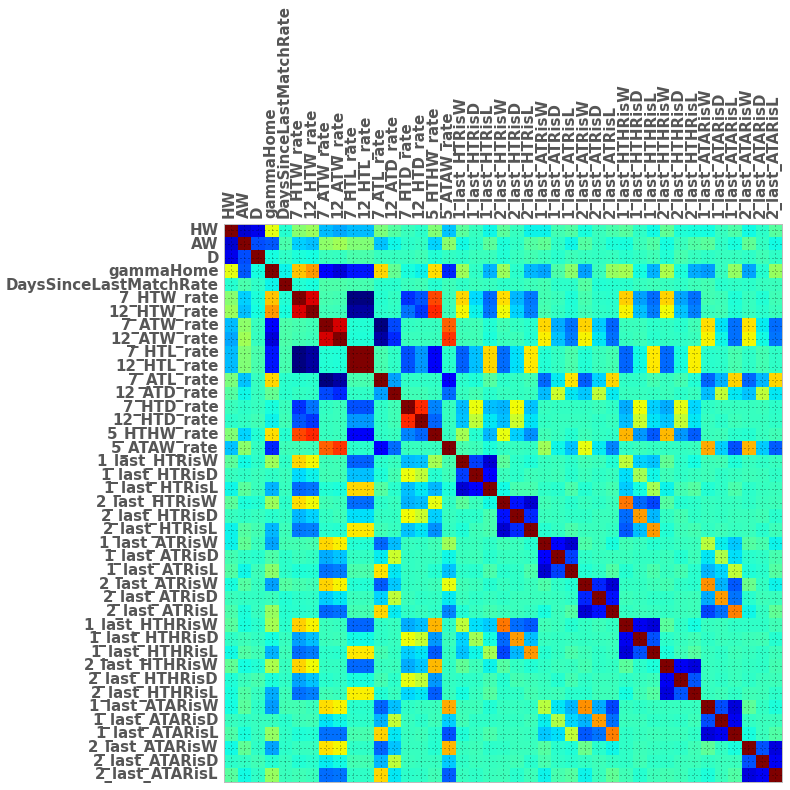

In [117]:
#and in a more understandable and graphical form
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = 90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
plot_corr(E0_data_copy)

**Conclusion** : as expected, inputs variables most correlated (positively or negatively) to responses (HW, AW, D) are gammaHome, 7_H/ATW/L_rate, 12_H/ATW/L_rate and 5_HTHW_rate, 5_ATAW_rate. 7/12_H/ATD_rate is not highly correlated to any of the responses. There is also an important correlation between some predictors : 
- rates based predictors and gammaHome are highly correlated.
- gammaHome is even correlated (0.15-0.3) to lagged performances features
- lagged performances features are correlated together (1_last_HTHR with 1/2_last_HTR for example) and correlated to rates features based.


To produce a good model, selection variables process will be important and consequently, the validation process will be important. Nevertheless, We can't use here any simple cross-validation method because a single match result must be predicted only given past data. We will have to set up a cross-validation like method to evaluate without bias real models accuracies. 